In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, KFold, cross_val_score, cross_val_predict


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from sklearn.svm import SVR
import time

In [2]:
Ames_original = pd.read_csv('Ames_HousePrice.csv', index_col=0)

Ames = Ames_original.copy()

In [3]:
# Dataset shape
print(Ames.shape)
 
rows, columns = Ames.shape
print(f"The dataset comprises {rows} properties described across {columns} attributes.")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(Ames.head())

(2580, 81)
The dataset comprises 2580 properties described across 81 attributes.
First few rows of the dataset:
         PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
1  909176150        856     126000          30       RL          NaN     7890   
2  905476230       1049     139500         120       RL         42.0     4235   
3  911128020       1001     124900          30  C (all)         60.0     6060   
4  535377150       1039     114000          70       RL         80.0     8146   
5  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
1   Pave   NaN      Reg  ...         166        0    NaN   NaN         NaN   
2   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
3   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
4   Pave   NaN      Reg  ...         111        0    NaN   NaN         NaN   
5   Pave   

In [4]:
# Determine the data type for each feature
data_types = Ames.dtypes

# Tally the total by data type
type_counts = data_types.value_counts()

print(type_counts)

object     43
int64      27
float64    11
Name: count, dtype: int64


In [5]:
# Determine the data type for each feature
data_types = Ames.dtypes

# View a few datatypes from the dataset (first and last 5 features)
print(data_types)

PID               int64
GrLivArea         int64
SalePrice         int64
MSSubClass        int64
MSZoning         object
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 81, dtype: object


In [6]:
# Check the structure of the dataset
print("\nStructure of the dataset:")
print(Ames.info())


Structure of the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   

In [7]:


# Calculating the percentage of missing values for each column
missing_data = Ames.isnull().sum()
missing_percentage = (missing_data / len(Ames)) * 100

# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Sorting the DataFrame by the percentage of missing values in descending order
missing_info = missing_info.sort_values(by='Percentage', ascending=False)

# Display columns with missing values
print(missing_info[missing_info['Missing Values'] > 0])

              Missing Values  Percentage
PoolQC                  2571   99.651163
MiscFeature             2483   96.240310
Alley                   2412   93.488372
Fence                   2055   79.651163
MasVnrType              1573   60.968992
FireplaceQu             1241   48.100775
LotFrontage              462   17.906977
GarageQual               129    5.000000
GarageFinish             129    5.000000
GarageYrBlt              129    5.000000
GarageCond               129    5.000000
GarageType               127    4.922481
BsmtExposure              71    2.751938
BsmtFinType2              70    2.713178
BsmtCond                  69    2.674419
BsmtQual                  69    2.674419
BsmtFinType1              69    2.674419
MasVnrArea                14    0.542636
BsmtHalfBath               2    0.077519
BsmtFullBath               2    0.077519
GarageArea                 1    0.038760
GarageCars                 1    0.038760
Electrical                 1    0.038760
BsmtUnfSF       

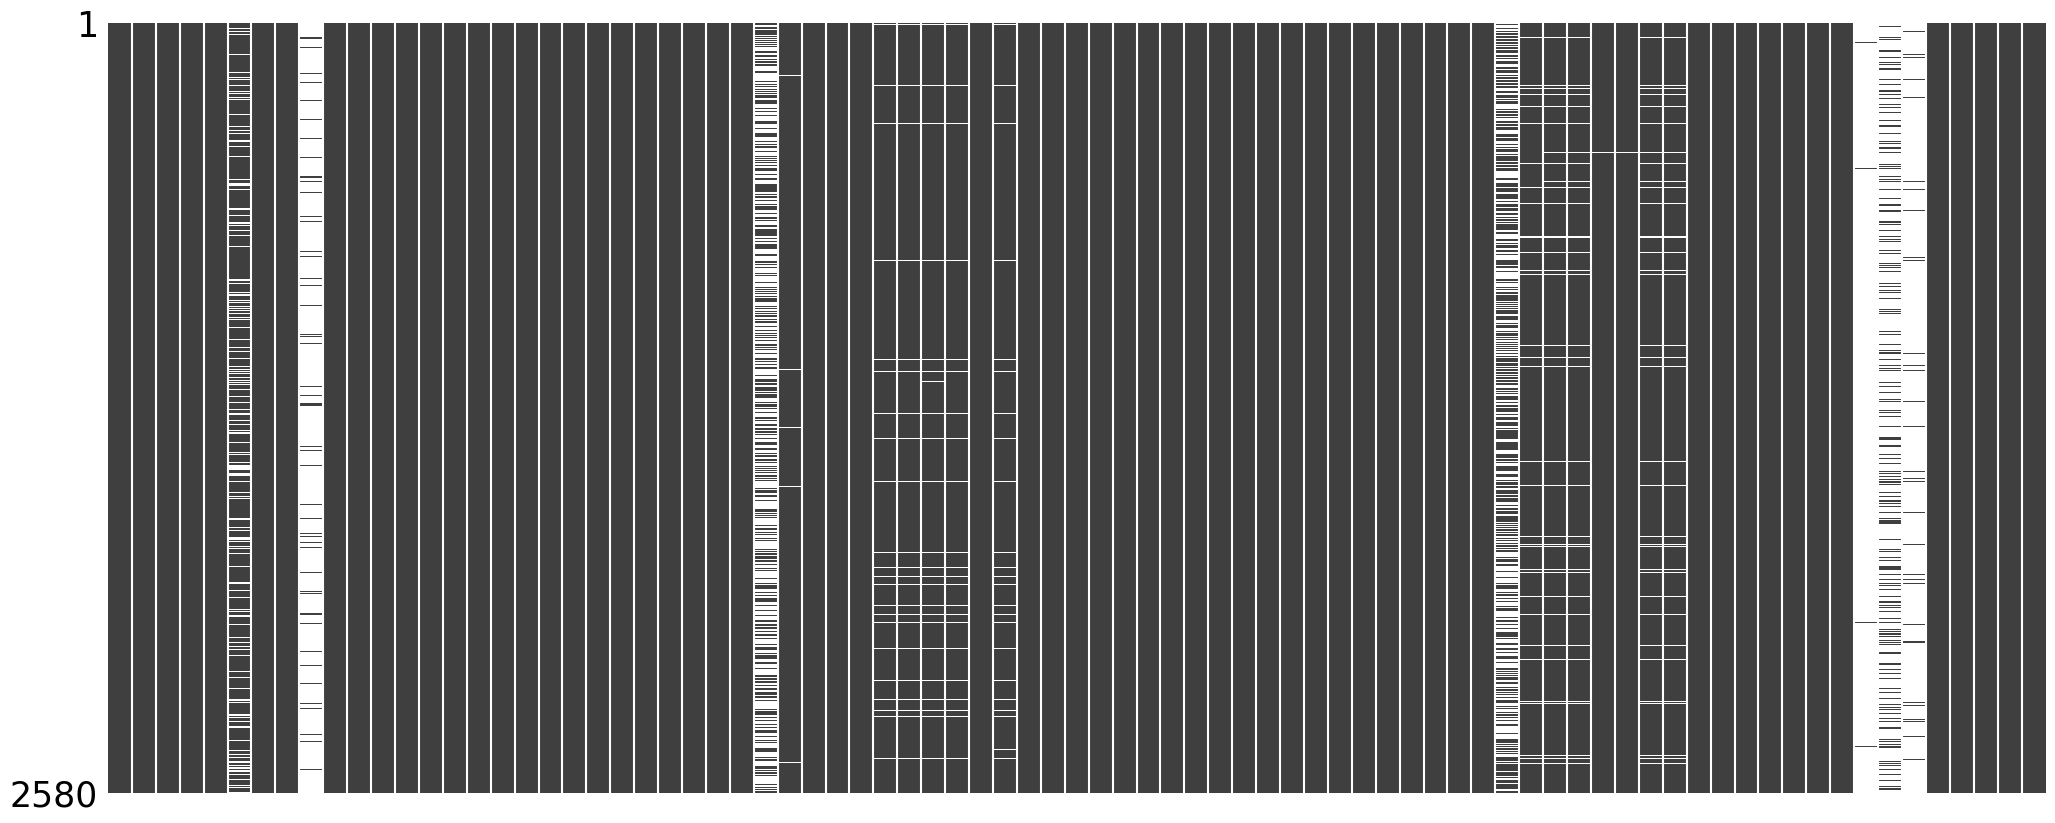

In [8]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(Ames, sparkline=False, fontsize=20)
plt.show()

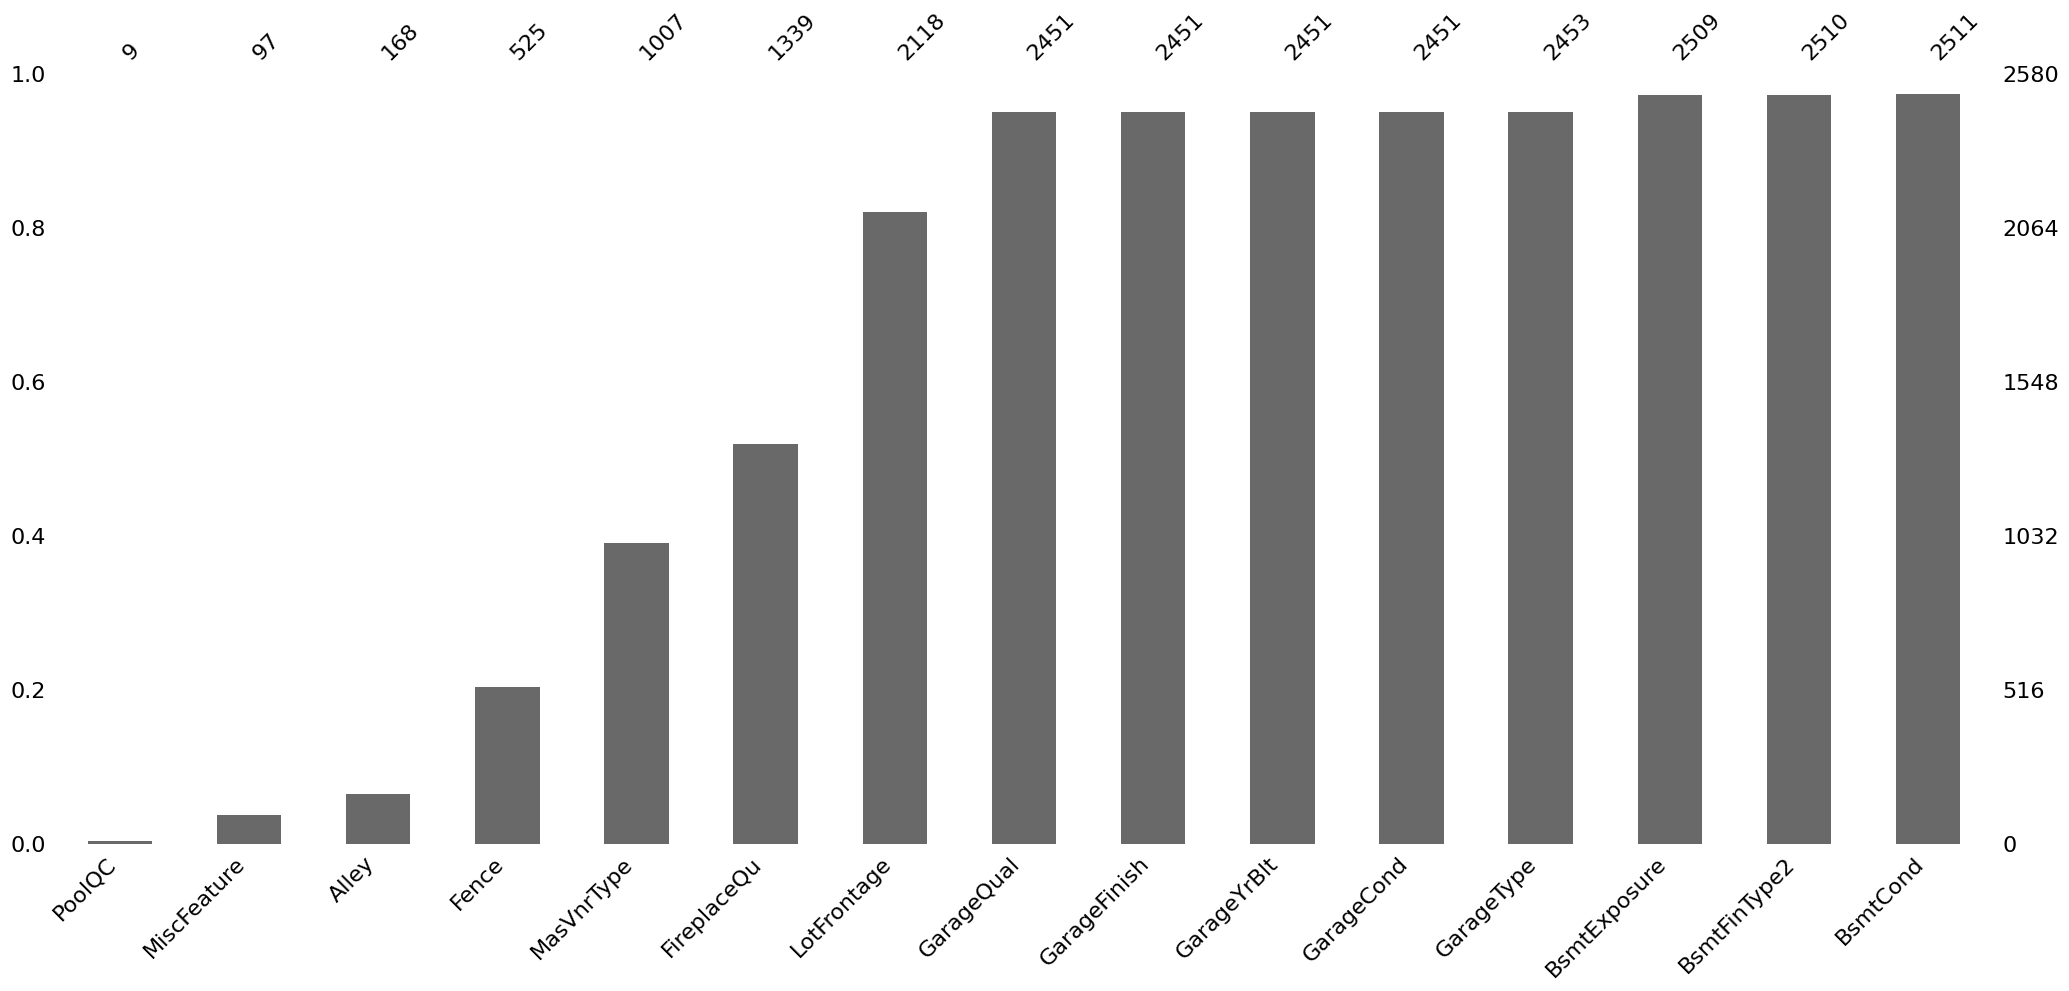

In [9]:
# Calculating the percentage of missing values for each column
missing_data = Ames.isnull().sum()
missing_percentage = (missing_data / len(Ames)) * 100

# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Sort the DataFrame columns by the percentage of missing values
sorted_df = Ames[missing_info.sort_values(by='Percentage', ascending=False).index]

# Select the top 15 columns with the most missing values
top_15_missing = sorted_df.iloc[:, :15]

#Visual with missingno
msno.bar(top_15_missing)
plt.show()

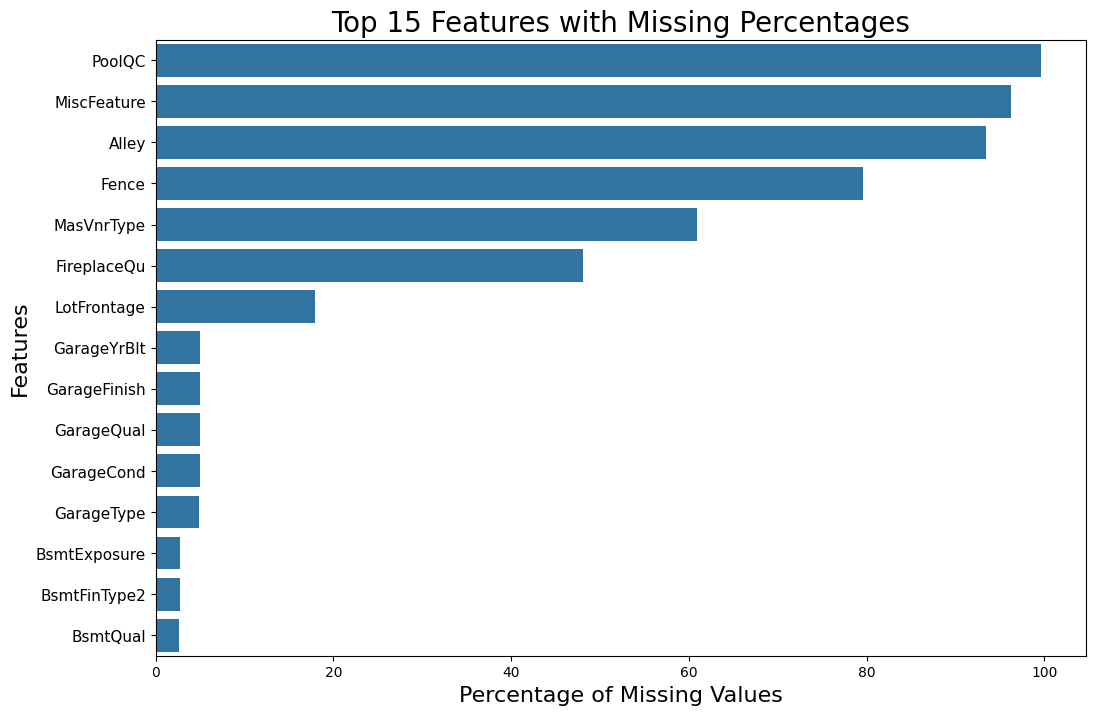

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to show only the top 15 columns with the most missing values
top_15_missing_info = missing_info.nlargest(15, 'Percentage')

# Create the horizontal bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y=top_15_missing_info.index, data=top_15_missing_info, orient='h')
plt.title('Top 15 Features with Missing Percentages', fontsize=20)
plt.xlabel('Percentage of Missing Values', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.yticks(fontsize=11)
plt.show()

In [164]:
Ames = Ames_original.copy()

In [165]:
def cap_outliers(df, cols, lower_q=0.01, upper_q=0.99):
    df = df.copy()
    for col in cols:
        lower = df[col].quantile(lower_q)
        upper = df[col].quantile(upper_q)
        df[col] = df[col].clip(lower, upper)
    return df

Ames_capped = cap_outliers(
    Ames,
    cols=["SalePrice", "GrLivArea", "LotArea"],
    lower_q=0.01,  # bottom 1%
    upper_q=0.99   # top 1%
)

print("Before:", Ames.shape, "After:", Ames_capped.shape)

Before: (2580, 88) After: (2580, 88)


In [166]:
Ames = Ames_capped.copy()

In [168]:
# 1) Create QualBin from OverallQual, then combined category
Ames["QualBin"] = pd.qcut(Ames["OverallQual"], q=3, labels=["low","med","high"])
Ames["Neighborhood_QualBin"] = Ames["Neighborhood"].astype(str) + "_" + Ames["QualBin"].astype(str)

# Ensure types so your existing ColumnTransformer routes them correctly
Ames["QualBin"] = Ames["QualBin"].astype("object")
Ames["Neighborhood_QualBin"] = Ames["Neighborhood_QualBin"].astype("object")

In [171]:
# Targeted Feature Engineering
Ames["GrLivArea_per_LotArea"] = Ames["GrLivArea"] / (Ames["LotArea"] + 1)
Ames["TotalSF"] = Ames["TotalBsmtSF"] + Ames["1stFlrSF"] + Ames["2ndFlrSF"]
Ames['TotalBaths'] = Ames['FullBath'] + 0.5 * Ames['HalfBath'] + Ames['BsmtFullBath'] + 0.5*Ames['BsmtHalfBath']
Ames["HouseAge"] = Ames["YrSold"].astype(int) - Ames["YearBuilt"].astype(int)
Ames["HouseAgeSinceRemod"] = Ames["YrSold"].astype(int) - Ames["YearRemodAdd"].astype(int)
Ames["WasRemodeled"] = Ames['YearRemodAdd'] > Ames["YearBuilt"].astype(int)
Ames["GarageAge"] = Ames['YrSold'].astype(int) - Ames['GarageYrBlt']



# Convert the below numeric features to categorical features
Ames['MSSubClass'] = Ames['MSSubClass'].astype('object')
Ames['YrSold'] = Ames['YrSold'].astype('object')
Ames['MoSold'] = Ames['MoSold'].astype('object')
Ames['WasRemodeled'] = Ames['WasRemodeled'].astype('object')



# Exclude 'PID' and 'SalePrice' from features and specifically handle the 'Electrical' column
numeric_features = Ames.select_dtypes(include=['int64', 'float64']).drop(columns=['PID', 'SalePrice']).columns
categorical_features = Ames.select_dtypes(include=['object']).columns.difference(['Electrical'])
electrical_feature = ['Electrical']

# Manually specify the categories for ordinal encoding according to the data dictionary
ordinal_order = {
    'Electrical': ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],  # Electrical system
    'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],  # General shape of property
    'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],  # Type of utilities available
    'LandSlope': ['Sev', 'Mod', 'Gtl'],  # Slope of property
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Evaluates the quality of the material on the exterior
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Evaluates the present condition of the material on the exterior
    'BsmtQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Height of the basement
    'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # General condition of the basement
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'],  # Walkout or garden level basement walls
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Quality of basement finished area
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Quality of second basement finished area
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Heating quality and condition
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Kitchen quality
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],  # Home functionality
    'FireplaceQu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Fireplace quality
    'GarageFinish': ['None', 'Unf', 'RFn', 'Fin'],  # Interior finish of the garage
    'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Garage quality
    'GarageCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Garage condition
    'PavedDrive': ['N', 'P', 'Y'],  # Paved driveway
    'PoolQC': ['None', 'Fa', 'TA', 'Gd', 'Ex'],  # Pool quality
    'Fence': ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']  # Fence quality
}

# Extract list of ALL ordinal features from dictionary
ordinal_features = list(ordinal_order.keys())
# List of ordinal features except Electrical
ordinal_except_electrical = [feature for feature in ordinal_features if feature != 'Electrical']

# Helper function to fill 'None' for missing categorical data
def fill_none(X):
    return X.infer_objects(copy=False).fillna("None")


# Pipeline for 'Electrical': Fill missing value with mode then apply ordinal encoding
electrical_transformer = Pipeline(steps=[
    ('impute_electrical', SimpleImputer(strategy='most_frequent')),
    ('ordinal_electrical', OrdinalEncoder(categories=[ordinal_order['Electrical']]))
])
# Pipeline for numeric features: Impute missing values using mean
numeric_transformer = Pipeline(steps=[
    ('impute_mean', SimpleImputer(strategy='mean'))
])
# Pipeline for ordinal features: Fill missing values with 'None' then apply ordinal encoding
ordinal_transformer = Pipeline(steps=[
    ('fill_none', FunctionTransformer(fill_none, validate=False)),
    ('ordinal', OrdinalEncoder(categories=[ordinal_order[feature] for feature in ordinal_features if feature in ordinal_except_electrical]))
])
# Pipeline for nominal categorical features: Fill missing values with 'None' then apply one-hot encoding
nominal_features = [feature for feature in categorical_features if feature not in ordinal_features]
# --- make OHE dense and build correct column names ---

# 1) OneHotEncoder: dense output
try:
    categorical_transformer = Pipeline(steps=[
        ('fill_none', FunctionTransformer(fill_none, validate=False)),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # sklearn >= 1.2
    ])
except TypeError:
    categorical_transformer = Pipeline(steps=[
        ('fill_none', FunctionTransformer(fill_none, validate=False)),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))         # fallback for older sklearn
    ])

# 2) Rebuild the ColumnTransformer with the (possibly) new categorical_transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('electrical', electrical_transformer, ['Electrical']),
        ('num',       numeric_transformer,      numeric_features),
        ('ordinal',   ordinal_transformer,      ordinal_except_electrical),
        ('nominal',   categorical_transformer,  nominal_features),
    ]
)

# 3) Fit/transform
transformed_data = preprocessor.fit_transform(Ames)

# Densify defensively (in case any branch still returns sparse)
if hasattr(transformed_data, "toarray"):
    transformed_data = transformed_data.toarray()

# One-hot feature names (pass the original nominal features)
onehot_step = preprocessor.named_transformers_['nominal'].named_steps['onehot']
onehot_feature_names = onehot_step.get_feature_names_out(nominal_features)

# Assemble names: Electrical (1 col) + numeric + ordinal + one-hot
feature_names = (
    ['Electrical']
    + list(numeric_features)
    + list(ordinal_except_electrical)
    + list(onehot_feature_names)
)

# Build the DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=feature_names, index=Ames.index)

In [169]:
# Targeted Feature Engineering
Ames["GrLivArea_per_LotArea"] = Ames["GrLivArea"] / (Ames["LotArea"] + 1)
Ames["TotalSF"] = Ames["TotalBsmtSF"] + Ames["1stFlrSF"] + Ames["2ndFlrSF"]
Ames['TotalBaths'] = Ames['FullBath'] + 0.5 * Ames['HalfBath'] + Ames['BsmtFullBath'] + 0.5*Ames['BsmtHalfBath']
Ames["HouseAge"] = Ames["YrSold"].astype(int) - Ames["YearBuilt"].astype(int)
Ames["HouseAgeSinceRemod"] = Ames["YrSold"].astype(int) - Ames["YearRemodAdd"].astype(int)
Ames["WasRemodeled"] = Ames['YearRemodAdd'] > Ames["YearBuilt"].astype(int)
Ames["GarageAge"] = Ames['YrSold'].astype(int) - Ames['GarageYrBlt']



# Convert the below numeric features to categorical features
Ames['MSSubClass'] = Ames['MSSubClass'].astype('object')
Ames['YrSold'] = Ames['YrSold'].astype('object')
Ames['MoSold'] = Ames['MoSold'].astype('object')
Ames['WasRemodeled'] = Ames['WasRemodeled'].astype('object')



# Exclude 'PID' and 'SalePrice' from features and specifically handle the 'Electrical' column
numeric_features = Ames.select_dtypes(include=['int64', 'float64']).drop(columns=['PID', 'SalePrice']).columns
categorical_features = Ames.select_dtypes(include=['object']).columns.difference(['Electrical'])
electrical_feature = ['Electrical']

# Manually specify the categories for ordinal encoding according to the data dictionary
ordinal_order = {
    'Electrical': ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],  # Electrical system
    'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],  # General shape of property
    'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],  # Type of utilities available
    'LandSlope': ['Sev', 'Mod', 'Gtl'],  # Slope of property
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Evaluates the quality of the material on the exterior
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Evaluates the present condition of the material on the exterior
    'BsmtQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Height of the basement
    'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # General condition of the basement
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'],  # Walkout or garden level basement walls
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Quality of basement finished area
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Quality of second basement finished area
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Heating quality and condition
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Kitchen quality
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],  # Home functionality
    'FireplaceQu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Fireplace quality
    'GarageFinish': ['None', 'Unf', 'RFn', 'Fin'],  # Interior finish of the garage
    'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Garage quality
    'GarageCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Garage condition
    'PavedDrive': ['N', 'P', 'Y'],  # Paved driveway
    'PoolQC': ['None', 'Fa', 'TA', 'Gd', 'Ex'],  # Pool quality
    'Fence': ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']  # Fence quality
}

# Extract list of ALL ordinal features from dictionary
ordinal_features = list(ordinal_order.keys())
# List of ordinal features except Electrical
ordinal_except_electrical = [feature for feature in ordinal_features if feature != 'Electrical']

# Helper function to fill 'None' for missing categorical data
def fill_none(X):
    return X.infer_objects(copy=False).fillna("None")


# Pipeline for 'Electrical': Fill missing value with mode then apply ordinal encoding
electrical_transformer = Pipeline(steps=[
    ('impute_electrical', SimpleImputer(strategy='most_frequent')),
    ('ordinal_electrical', OrdinalEncoder(categories=[ordinal_order['Electrical']]))
])
# Pipeline for numeric features: Impute missing values using mean
numeric_transformer = Pipeline(steps=[
    ('impute_mean', SimpleImputer(strategy='mean'))
])
# Pipeline for ordinal features: Fill missing values with 'None' then apply ordinal encoding
ordinal_transformer = Pipeline(steps=[
    ('fill_none', FunctionTransformer(fill_none, validate=False)),
    ('ordinal', OrdinalEncoder(categories=[ordinal_order[feature] for feature in ordinal_features if feature in ordinal_except_electrical]))
])
# Pipeline for nominal categorical features: Fill missing values with 'None' then apply one-hot encoding
nominal_features = [feature for feature in categorical_features if feature not in ordinal_features]
categorical_transformer = Pipeline(steps=[
    ('fill_none', FunctionTransformer(fill_none, validate=False)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Combined preprocessor for numeric, ordinal, nominal, and specific electrical data
preprocessor = ColumnTransformer(
    transformers=[
        ('electrical', electrical_transformer, ['Electrical']),
        ('num', numeric_transformer, numeric_features),
        ('ordinal', ordinal_transformer, ordinal_except_electrical),
        ('nominal', categorical_transformer, nominal_features)
])

# Apply the preprocessing pipeline to Ames
transformed_data = preprocessor.fit_transform(Ames)

# Generate column names for the one-hot encoded features
onehot_features = preprocessor.named_transformers_['nominal'].named_steps['onehot'].get_feature_names_out()
 
# Combine all feature names
all_feature_names = ['Electrical'] + list(numeric_features) + list(ordinal_except_electrical) + list(onehot_features)

# Convert the transformed array to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)

ValueError: Shape of passed values is (2580, 1), indices imply (2580, 331)

In [20]:
rf = RandomForestRegressor(random_state=42)

# Use standard KFold for regression
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid = {
    'n_estimators': range(30, 110, 30),
    'max_depth': range(3, 20, 2)
}

gsCV = GridSearchCV(
    rf,
    grid,
    cv=cv,
    scoring='neg_root_mean_squared_error',  # RMSE in regression
    return_train_score=True,
    n_jobs=4
)

In [21]:
from joblib import parallel_backend
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

rf = RandomForestRegressor(random_state=42, n_jobs=1)  # avoid nested parallelism
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid = {'n_estimators': range(30, 110, 30), 'max_depth': range(3, 20, 2)}
gs = GridSearchCV(rf, grid, cv=cv, n_jobs=4, scoring='neg_root_mean_squared_error', return_train_score=True)

with parallel_backend('threading'):
    results = gs.fit(transformed_df, Ames.SalePrice)

ans = pd.DataFrame(results.cv_results_)

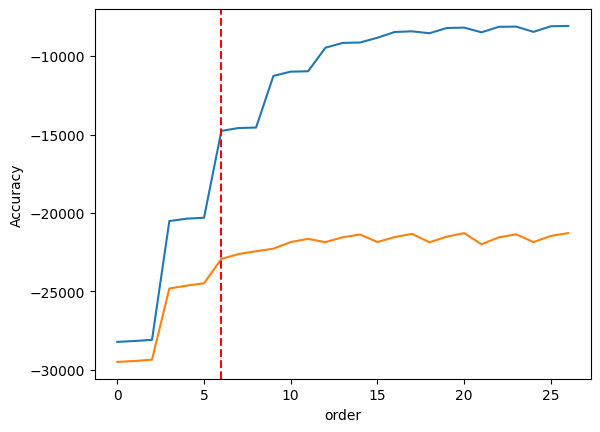

In [22]:
ans['mean_train_score'].plot()
ans['mean_test_score'].plot()
plt.xlabel('order')
plt.ylabel('Accuracy')
plt.axvline(x=6,linestyle='--', color='r')
plt.show()

In [17]:
ans['params'][6]

{'max_depth': 7, 'n_estimators': 30}

In [23]:
rf.set_params(max_depth=7, n_estimators=30)
rf.fit(transformed_df, Ames.SalePrice)

,n_estimators,30
,criterion,'squared_error'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
model_importance = pd.Series(rf.feature_importances_, index=transformed_df.columns).sort_values(ascending=False)

model_importance.head(10)

TotalSF         0.481808
OverallQual     0.350857
YearBuilt       0.036253
YearRemodAdd    0.010770
GarageArea      0.008140
BsmtQual        0.008005
TotalBaths      0.007866
GrLivArea       0.007584
KitchenQual     0.007191
BsmtFinSF1      0.007140
dtype: float64

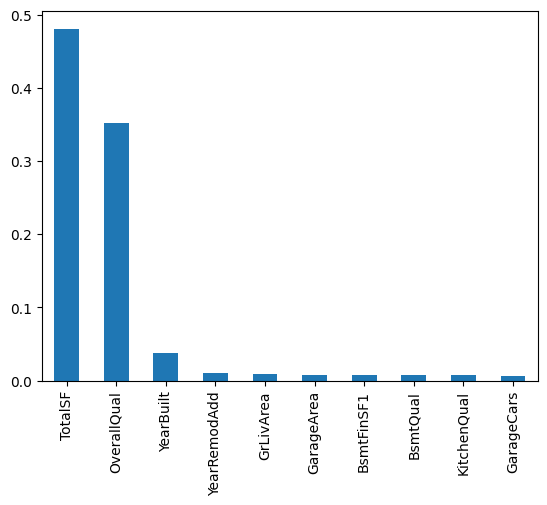

In [84]:
model_importance.head(10).plot(kind="bar")
plt.show()

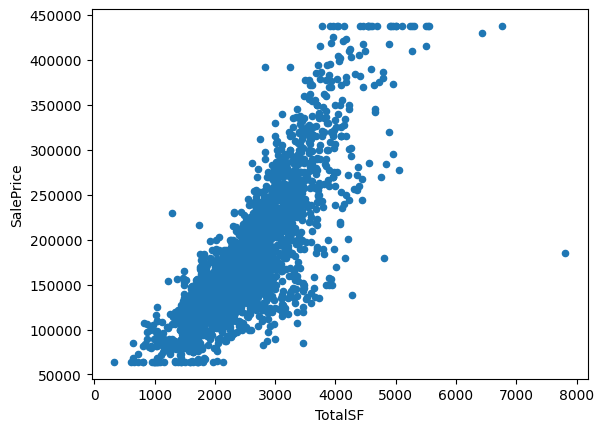

In [147]:
Ames[[model_importance.index[0], 'SalePrice']].plot(kind='scatter', x=model_importance.index[0], y='SalePrice')
plt.show()

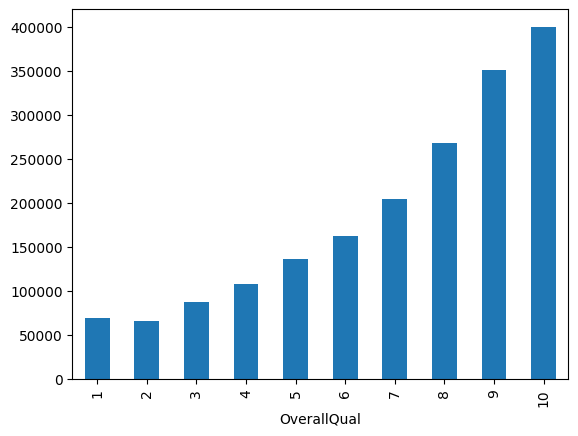

In [22]:
Ames.groupby(model_importance.index[1])['SalePrice'].mean().plot(kind="bar")
plt.show()

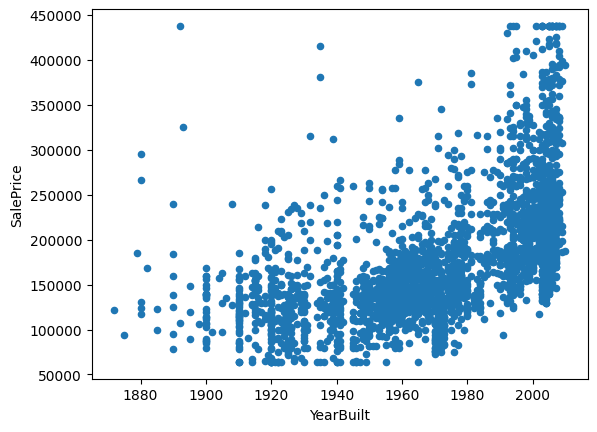

In [23]:
Ames[[model_importance.index[2], 'SalePrice']].plot(kind='scatter', x=model_importance.index[2], y='SalePrice')
plt.show()

In [140]:
X = transformed_df.copy()

# ---- 1. Define which numeric columns to log-transform ----
log_cols = [
    "LotArea", "LotFrontage", "MasVnrArea",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea",
    "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "TotalSF", "GrLivArea_per_LotArea"
]

# Keep only columns that actually exist in X
log_cols = [c for c in log_cols if c in X.columns]

# ---- 2. Define full numeric scaling list ----
scale_features = [
    # Continuous
    "GrLivArea", "LotFrontage", "LotArea", "MasVnrArea",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GarageArea",
    "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch",
    "ScreenPorch", "PoolArea", "MiscVal", "TotalSF", "GrLivArea_per_LotArea",

    # Counts
    "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
    "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd",
    "Fireplaces", "GarageCars", "TotalBaths",

    # Ordinal-as-numeric
    "OverallQual", "OverallCond",

    # Year variables (or replace with "age")
    "YearBuilt",
    "YearRemodAdd",
    "GarageYrBlt",
    "HouseAge",
    "HouseAgeSinceRemod",
    "GarageAge"
]

scale_features = [c for c in scale_features if c in X.columns]

# ---- 3. Apply log transform first, then scale ----
X_num = X[scale_features].copy()
X_num[log_cols] = X_num[log_cols].apply(np.log1p)

scaler = StandardScaler()
X_scaled_num = pd.DataFrame(
    scaler.fit_transform(X_num),
    columns=scale_features,
    index=X.index
)

# ---- 4. Combine back with one-hot columns ----
onehot_cols = [c for c in X.columns if c not in scale_features]
X_final = pd.concat([X_scaled_num, X[onehot_cols]], axis=1)

target_scaled = np.log1p(Ames.SalePrice)

In [126]:
# Descriptive statistics for numerical columns
print(X_final.describe())

          GrLivArea   LotFrontage       LotArea    MasVnrArea    BsmtFinSF1  \
count  2.580000e+03  2.580000e+03  2.580000e+03  2.580000e+03  2.580000e+03   
mean  -7.959180e-16  1.936091e-15  3.924509e-15 -2.382246e-16 -8.124423e-17   
std    1.000194e+00  1.000194e+00  1.000194e+00  1.000194e+00  1.000194e+00   
min   -2.357390e+00 -3.436400e+00 -3.333658e+00 -7.951654e-01 -1.480607e+00   
25%   -7.572399e-01 -2.608717e-01 -3.451131e-01 -7.951654e-01 -1.480607e+00   
50%    5.544383e-02  1.460487e-01  1.331125e-01 -7.951654e-01  5.508053e-01   
75%    6.530267e-01  5.442701e-01  5.402550e-01  1.143857e+00  7.700324e-01   
max    2.190640e+00  4.841112e+00  2.640829e+00  2.030826e+00  1.158512e+00   

         BsmtFinSF2     BsmtUnfSF   TotalBsmtSF      1stFlrSF      2ndFlrSF  \
count  2.580000e+03  2.580000e+03  2.580000e+03  2.580000e+03  2.580000e+03   
mean   3.855658e-17 -2.093072e-16  6.637240e-16  2.071039e-15  1.404561e-16   
std    1.000194e+00  1.000194e+00  1.000194e+00  1.

In [60]:
def univariate_linreg_statsmodels(
    X: pd.DataFrame,
    y: pd.Series,
    *,
    log_target: bool = False
) -> pd.DataFrame:
    """
    Runs separate OLS for each single feature vs. y.
    If log_target=True, fits on log1p(y) and reports RMSE in dollars (back-transformed).
    Coefficients and intercept are reported in the model's native space
    (log-price when log_target=True; raw dollars otherwise).
    """
    rows = []
    y_array = np.asarray(y)
    y_trainable = np.log1p(y_array) if log_target else y_array  # training target

    for col in X.columns:
        x = X[[col]]
        if np.allclose(x.values.std(), 0):
            # constant feature: skip fit/metrics
            rows.append({
                "feature": col,
                "r2": np.nan,
                "rmse": np.nan,
                "coef": 0.0,
                "intercept": float(np.mean(y_trainable)),
                "p_value": np.nan,
                "coef_ci_low": np.nan,
                "coef_ci_high": np.nan,
                "fitted_on_log_target": bool(log_target)
            })
            continue

        Xc = sm.add_constant(x, has_constant="add")
        model = sm.OLS(y_trainable, Xc).fit()

        # Predictions in training space
        y_pred_train_space = model.predict(Xc)

        # RMSE: report in dollars if we trained in log space
        if log_target:
            y_pred_dollars = np.expm1(y_pred_train_space)
            rmse = float(np.sqrt(((y_array - y_pred_dollars) ** 2).mean()))
        else:
            rmse = float(np.sqrt(((y_array - y_pred_train_space) ** 2).mean()))

        coef = float(model.params[col])
        ci_low, ci_high = model.conf_int().loc[col].tolist()
        p = float(model.pvalues[col])

        rows.append({
            "feature": col,
            "r2": float(model.rsquared),
            "rmse": rmse,
            "coef": coef,
            "intercept": float(model.params["const"]),
            "p_value": p,
            "coef_ci_low": float(ci_low),
            "coef_ci_high": float(ci_high),
            "fitted_on_log_target": bool(log_target)
        })

    out = pd.DataFrame(rows).sort_values("r2", ascending=False).reset_index(drop=True)
    return out

In [127]:
results_df = univariate_linreg_statsmodels(X_final, Ames.SalePrice, log_target=True)

results_df.head(10)

,feature,r2,rmse,coef,intercept,p_value,coef_ci_low,coef_ci_high,fitted_on_log_target
0,OverallQual,0.667112,40199.633859,0.305201,12.014532,0.000000e+00,0.296875,0.313527,True
1,TotalSF,0.663570,41259.533396,0.304390,12.014532,0.000000e+00,0.296020,0.312760,True
2,GrLivArea,0.541332,49511.040152,0.274928,12.014532,0.000000e+00,0.265154,0.284701,True
3,GarageCars,0.456745,53713.732032,0.252536,12.014532,0.000000e+00,0.241900,0.263173,True
4,TotalBaths,0.454998,57227.772930,0.252053,12.014532,0.000000e+00,0.241399,0.262706,True
5,ExterQual,0.452562,51350.303177,0.449184,10.949547,0.000000e+00,0.430105,0.468264,True
6,KitchenQual,0.431690,52653.248827,0.383405,11.063894,1.092597e-318,0.366416,0.400395,True
7,1stFlrSF,0.390285,55438.938098,0.233441,12.014532,2.684690e-279,0.222173,0.244710,True
8,BsmtQual,0.389264,54925.298508,0.264076,11.103162,2.325087e-278,0.251302,0.276851,True
9,HouseAge,0.365617,58273.815114,-0.225944,12.014532,4.418184e-257,-0.237438,-0.214450,True


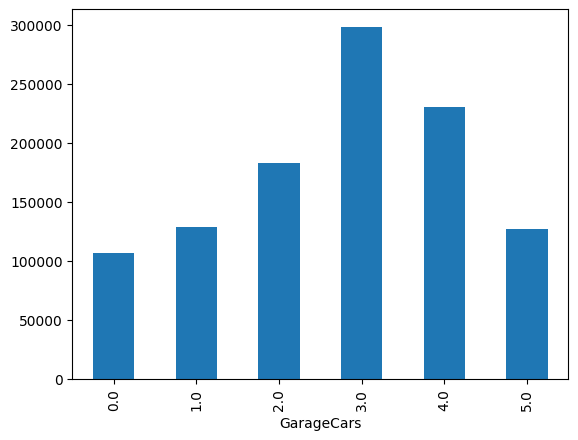

In [28]:
Ames.groupby(results_df.feature[3])['SalePrice'].mean().plot(kind="bar")
plt.show()

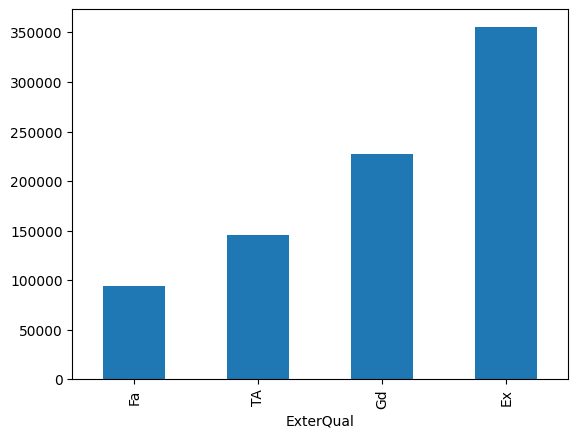

In [29]:
Ames.groupby(results_df.feature[4])['SalePrice'].mean().sort_values().plot(kind="bar")
plt.show()

In [64]:


# --- Helpers ---
def rmse_compat(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)  # works across sklearn versions
    return float(np.sqrt(mse))

def get_feature_names(X):
    if hasattr(X, "columns"):
        return list(X.columns)
    return [f"x{i}" for i in range(X.shape[1])]

# --- Main ---
def fit_multiple_linreg_all_features(
    X, y, *, test_size=0.2, random_state=42, n_splits=5, log_target=False
):
    """
    X: preprocessed feature matrix (DataFrame or ndarray), no NaNs
    y: target Series/array (SalePrice)
    log_target: if True, fits on log1p(y) and reports back-transformed RMSE too
    """
    feature_names = get_feature_names(X)

    # Target transform (optional)
    if log_target:
        y_trainable = np.log1p(y)
    else:
        y_trainable = np.asarray(y)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_trainable, test_size=test_size, random_state=random_state
    )

    # Fit
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Predict
    y_pred_test = lr.predict(X_test)
    y_pred_train = lr.predict(X_train)

    # Metrics (in target space)
    if log_target:
        # Back-transform for error metrics in dollars
        y_test_dollars = np.expm1(y_test)
        y_pred_test_dollars = np.expm1(y_pred_test)
        test_rmse = rmse_compat(y_test_dollars, y_pred_test_dollars)
        test_r2 = r2_score(y_test_dollars, y_pred_test_dollars)
    else:
        test_rmse = rmse_compat(y_test, y_pred_test)
        test_r2 = float(r2_score(y_test, y_pred_test))

    # Cross-validated RMSE (on full data)
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    neg_mse = cross_val_score(lr, X, y_trainable, scoring="neg_mean_squared_error", cv=cv)
    if log_target:
        # Back-transform each fold's MSE is not available; report in log space as approx
        cv_rmse = float(np.sqrt(-neg_mse).mean())
        cv_rmse_std = float(np.sqrt(-neg_mse).std())
    else:
        cv_rmse = float(np.sqrt(-neg_mse).mean())
        cv_rmse_std = float(np.sqrt(-neg_mse).std())

    # Coefficients
    coef_df = pd.DataFrame({
        "feature": feature_names,
        "coef": lr.coef_,
        "abs_coef": np.abs(lr.coef_)
    }).sort_values("abs_coef", ascending=False).reset_index(drop=True)

    metrics = {
        "test_rmse": test_rmse,
        "test_r2": test_r2,
        "cv_rmse_mean": cv_rmse,
        "cv_rmse_std": cv_rmse_std,
        "intercept": float(lr.intercept_),
        "fitted_on_log_target": bool(log_target),
    }

    # Also return out-of-sample predictions (useful for residual checks)
    outputs = {
        "y_test_pred": y_pred_test if not log_target else y_pred_test_dollars,
        "y_test_true": y_test if not log_target else y_test_dollars,
    }

    return lr, coef_df, metrics, outputs

In [101]:
lr, coef_df, metrics, out = fit_multiple_linreg_all_features(X_final, Ames["SalePrice"], log_target=True)

In [102]:
print(metrics)

{'test_rmse': 20987.029752800558, 'test_r2': 0.9176448928145764, 'cv_rmse_mean': 0.10122483859088219, 'cv_rmse_std': 0.006142720828758496, 'intercept': 10.83499988039528, 'fitted_on_log_target': True}


In [33]:
residuals = pd.Series(out["y_test_true"] - out["y_test_pred"], name="residuals")

In [34]:
def coef_to_pct_change(coef_df):
    df_pct = coef_df.copy()
    df_pct["pct_change"] = (np.exp(df_pct["coef"]) - 1) * 100
    return df_pct[["feature", "coef", "pct_change"]].sort_values(
        "pct_change", key=abs, ascending=False
    ).reset_index(drop=True)

coef_pct_df = coef_to_pct_change(coef_df)

# coef_pct_df must already have columns: ["feature", "coef", "pct_change"]
# X_final is your design matrix used to fit the model

def is_one_hot(col: pd.Series) -> bool:
    vals = pd.unique(col.dropna())
    # allow 0/1 in int or float form
    return set(np.asarray(vals)).issubset({0, 1, 0.0, 1.0})

# 1) Annotate feature type + counts/coverage
feature_types = {}
counts = {}
pct_of_data = {}

n = len(X_final)

for feat in coef_pct_df["feature"]:
    if feat in X_final.columns:
        if is_one_hot(X_final[feat]):
            feature_types[feat] = "one-hot categorical"
            counts[feat] = int(X_final[feat].sum())
            pct_of_data[feat] = (counts[feat] / n) * 100.0
        else:
            feature_types[feat] = "numeric"
            counts[feat] = None
            pct_of_data[feat] = 100.0  # numeric features apply to all rows
    else:
        feature_types[feat] = "unknown"
        counts[feat] = None
        pct_of_data[feat] = np.nan

coef_pct_df["feature_type"] = coef_pct_df["feature"].map(feature_types)
coef_pct_df["count"] = coef_pct_df["feature"].map(counts)
coef_pct_df["pct_of_data"] = coef_pct_df["feature"].map(pct_of_data)

def rarity_label(row):
    if row["feature_type"] == "numeric":
        return "Numeric (N/A)"
    if pd.isna(row["pct_of_data"]):
        return "N/A"
    if row["pct_of_data"] < 1:
        return "Very rare (<1%)"
    if row["pct_of_data"] < 5:
        return "Rare (1–5%)"
    return "Common (≥5%)"

coef_pct_df["rarity"] = coef_pct_df.apply(rarity_label, axis=1)

# Sort by absolute % change
coef_pct_df = coef_pct_df.sort_values("pct_change", key=np.abs, ascending=False).reset_index(drop=True)

# 2) Filter to "common": numeric OR ≥ 5% coverage
common_mask = (coef_pct_df["feature_type"] == "numeric") | (coef_pct_df["pct_of_data"] >= 5)
common_coef_df = (
    coef_pct_df.loc[common_mask, ["feature", "feature_type", "pct_change", "count", "pct_of_data", "rarity"]]
    .sort_values("pct_change", key=np.abs, ascending=False)
    .reset_index(drop=True)
)

print("=== FULL LIST WITH RARITY ===")
display(coef_pct_df[["feature", "feature_type", "pct_change", "count", "pct_of_data", "rarity"]])

print("\n=== COMMON FEATURES (numeric OR ≥5% one-hot) ===")
display(common_coef_df)

=== FULL LIST WITH RARITY ===


,feature,feature_type,pct_change,count,pct_of_data,rarity
0,Neighborhood_GrnHill,one-hot categorical,4.536042e+01,2.0,0.077519,Very rare (<1%)
1,Condition2_PosN,one-hot categorical,-3.005731e+01,3.0,0.116279,Very rare (<1%)
2,MSSubClass_150,one-hot categorical,-2.228443e+01,1.0,0.038760,Very rare (<1%)
3,Exterior1st_PreCast,one-hot categorical,2.217233e+01,1.0,0.038760,Very rare (<1%)
4,Exterior2nd_PreCast,one-hot categorical,2.217233e+01,1.0,0.038760,Very rare (<1%)
...,...,...,...,...,...,...
253,Heating_Floor,one-hot categorical,4.440892e-14,1.0,0.038760,Very rare (<1%)
254,MSZoning_A (agr),one-hot categorical,0.000000e+00,1.0,0.038760,Very rare (<1%)
255,RoofMatl_Membran,one-hot categorical,0.000000e+00,1.0,0.038760,Very rare (<1%)
256,Neighborhood_Landmrk,one-hot categorical,0.000000e+00,1.0,0.038760,Very rare (<1%)



=== COMMON FEATURES (numeric OR ≥5% one-hot) ===


,feature,feature_type,pct_change,count,pct_of_data,rarity
0,Utilities,numeric,21.433810,NaN,100.000000,Numeric (N/A)
1,GrLivArea,numeric,10.486860,NaN,100.000000,Numeric (N/A)
2,Neighborhood_Edwards,one-hot categorical,-8.774969,165.0,6.395349,Common (≥5%)
3,MSSubClass_50,one-hot categorical,8.093026,259.0,10.038760,Common (≥5%)
4,LotArea,numeric,7.622406,NaN,100.000000,Numeric (N/A)
...,...,...,...,...,...,...
119,MasVnrType_BrkFace,one-hot categorical,-0.066859,804.0,31.162791,Common (≥5%)
120,BldgType_TwnhsE,one-hot categorical,0.043881,202.0,7.829457,Common (≥5%)
121,YrSold_2008,one-hot categorical,0.043177,564.0,21.860465,Common (≥5%)
122,Electrical,numeric,0.036406,NaN,100.000000,Numeric (N/A)


In [67]:
RANDOM_STATE = 42
CV_FOLDS = 5

# =========================
# 1) Utilities
# =========================
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def cv_eval_models(X, y, models, *, cv=CV_FOLDS, log_target=False, random_state=RANDOM_STATE):
    """
    Cross-validated evaluation with optional log-target training and dollar-scale metrics.

    Returns a DataFrame with:
      - cv_rmse_mean / cv_rmse_std  (in $)
      - r2_cv   (OOF R², in $)
      - r2_full (fit-on-all-data R², in $)
    """
    y_np = y.to_numpy() if hasattr(y, "to_numpy") else np.asarray(y)
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)

    rows = []
    for name, model in models:
        fold_rmses = []
        oof_pred = np.zeros(len(y_np), dtype=float)

        for tr_idx, va_idx in kf.split(X):
            X_tr, X_va = (X.iloc[tr_idx], X.iloc[va_idx]) if hasattr(X, "iloc") else (X[tr_idx], X[va_idx])
            y_tr, y_va = y_np[tr_idx], y_np[va_idx]

            y_tr_used = np.log1p(y_tr) if log_target else y_tr
            model.fit(X_tr, y_tr_used)

            y_va_pred = model.predict(X_va)
            if log_target:
                y_va_pred = np.expm1(y_va_pred)

            fold_rmses.append(rmse(y_va, y_va_pred))
            oof_pred[va_idx] = y_va_pred

        r2_cv = r2_score(y_np, oof_pred)

        # Full-fit R² in $-space
        y_full_used = np.log1p(y_np) if log_target else y_np
        model.fit(X, y_full_used)
        y_full_pred = model.predict(X)
        if log_target:
            y_full_pred = np.expm1(y_full_pred)
        r2_full = r2_score(y_np, y_full_pred)

        rows.append({
            "model": name,
            "cv_rmse_mean": float(np.mean(fold_rmses)),
            "cv_rmse_std":  float(np.std(fold_rmses, ddof=0)),
            "r2_cv":  float(r2_cv),
            "r2_full": float(r2_full),
        })

    return pd.DataFrame(rows).sort_values("cv_rmse_mean").reset_index(drop=True)

# =========================
# 2) Penalized models: fit + interpretable coefs
# =========================
from sklearn.linear_model import LassoCV, ElasticNetCV, RidgeCV
from sklearn.model_selection import KFold

def evaluate_penalized_models_stable(
    X, y, *,
    log_target=True,
    random_state=RANDOM_STATE,
    top_n=50,
    min_pct=5.0,
    include_full=False
):
    """
    Fits RidgeCV, LassoCV, ElasticNetCV. Returns metrics and filtered coef tables
    with % change (if log_target), feature types, and coverage.
    Keeps all numeric features and one-hot features present in ≥ min_pct of homes.
    """
    y_array = np.asarray(y)
    y_trainable = np.log1p(y_array) if log_target else y_array

    cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
    alphas = np.logspace(-3, 3, 50)
    # alphas = np.logspace(-4, 4, 80)
    l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

    ridge = RidgeCV(alphas=alphas, cv=cv, scoring="neg_mean_squared_error").fit(X, y_trainable)
    lasso = LassoCV(alphas=alphas, cv=cv, random_state=random_state, max_iter=100_000, tol=1e-3).fit(X, y_trainable)
    enet  = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=cv,
                         random_state=random_state, max_iter=100_000, tol=1e-3).fit(X, y_trainable)

    def _metrics(name, model, y_true, y_pred_train_space):
        if log_target:
            y_pred = np.expm1(y_pred_train_space)
            return {"model": name,
                    "alpha": getattr(model, "alpha_", None),
                    "l1_ratio": getattr(model, "l1_ratio_", None),
                    "rmse": rmse(y_true, y_pred),
                    "r2": float(r2_score(y_true, y_pred))}
        else:
            return {"model": name,
                    "alpha": getattr(model, "alpha_", None),
                    "l1_ratio": getattr(model, "l1_ratio_", None),
                    "rmse": rmse(y_true, y_pred_train_space),
                    "r2": float(r2_score(y_true, y_pred_train_space))}

    results = pd.DataFrame([
        _metrics("Ridge",      ridge, y_array, ridge.predict(X)),
        _metrics("Lasso",      lasso, y_array, lasso.predict(X)),
        _metrics("ElasticNet", enet,  y_array, enet.predict(X)),
    ])

    # coef tables
    feats = list(X.columns) if hasattr(X, "columns") else [f"x{i}" for i in range(X.shape[1])]

    def _coef_table(model):
        coef = np.asarray(model.coef_)
        df = pd.DataFrame({"feature": feats, "coef": coef})
        df["abs_coef"] = df["coef"].abs()
        return df.sort_values("abs_coef", ascending=False).head(top_n).reset_index(drop=True)

    raw_tables = {"Ridge": _coef_table(ridge), "Lasso": _coef_table(lasso), "ElasticNet": _coef_table(enet)}

    # feature typing & coverage
    def _is_one_hot(col: pd.Series) -> bool:
        vals = pd.unique(col.dropna())
        return set(np.asarray(vals)).issubset({0, 1, 0.0, 1.0})

    if hasattr(X, "columns"):
        n = len(X)
        is_dummy = {c: _is_one_hot(X[c]) for c in X.columns}
        coverage = {}
        for c in X.columns:
            if is_dummy[c]:
                col = X[c]
                # robust if any scaling slipped in
                cov = (col > 0.5).mean() if (np.issubdtype(col.dtype, np.number) and (col.max() > 1 or col.min() < 0)) else col.mean()
                coverage[c] = float(cov) * 100.0
            else:
                coverage[c] = 100.0
    else:
        is_dummy, coverage = {}, {}

    def _augment_and_filter(df):
        out = df.copy()
        out["pct_change"] = (np.exp(out["coef"]) - 1.0) * 100.0 if log_target else np.nan
        if hasattr(X, "columns"):
            out["feature_type"] = out["feature"].map(lambda f: "one-hot categorical" if is_dummy.get(f, False) else "numeric")
            out["pct_of_data"]  = out["feature"].map(lambda f: coverage.get(f, np.nan))
        else:
            out["feature_type"] = "unknown"; out["pct_of_data"] = np.nan
        mask = (out["feature_type"] == "numeric") | (out["pct_of_data"] >= min_pct)
        out = out[mask].copy()
        out = out.reindex(out[( "pct_change" if log_target else "abs_coef")].abs().sort_values(ascending=False).index)
        return out.reset_index(drop=True)

    filtered_tables = {name: _augment_and_filter(df) for name, df in raw_tables.items()}

    if include_full:
        return results, filtered_tables, raw_tables
    else:
        return results, filtered_tables

# =========================
# 3) Consensus table & plot (penalized models)
# =========================
def build_consensus_table(ridge_df: pd.DataFrame,
                          lasso_df: pd.DataFrame,
                          enet_df: pd.DataFrame,
                          min_models: int = 2) -> pd.DataFrame:
    def _prep(df, tag):
        return df[["feature", "feature_type", "pct_change", "pct_of_data"]].rename(
            columns={"pct_change": f"{tag}_pct", "pct_of_data": f"{tag}_pct_of_data"}
        )
    merged = _prep(ridge_df, "Ridge").merge(_prep(lasso_df, "Lasso"), on=["feature","feature_type"], how="outer") \
                                     .merge(_prep(enet_df, "ElasticNet"), on=["feature","feature_type"], how="outer")
    model_cols = ["Ridge_pct", "Lasso_pct", "ElasticNet_pct"]
    merged["n_models"] = merged[model_cols].notna().sum(axis=1)
    merged = merged[merged["n_models"] >= min_models].copy()
    merged["avg_pct_change"] = merged[model_cols].mean(axis=1, skipna=True)
    merged["std_pct_change"] = merged[model_cols].std(axis=1, ddof=0, skipna=True)
    coverage_cols = ["Ridge_pct_of_data", "Lasso_pct_of_data", "ElasticNet_pct_of_data"]
    merged["pct_of_data"] = merged[coverage_cols].max(axis=1, skipna=True)
    return merged.sort_values("avg_pct_change", key=lambda s: s.abs(), ascending=False).reset_index(drop=True)

def plot_consensus_bar(consensus_df: pd.DataFrame, top_n: int = 15, with_errorbars: bool = True, figsize=(9,6),
                       title="Consensus Feature Importance (Penalized Models)"):
    df = consensus_df.head(top_n).copy().sort_values("avg_pct_change", ascending=True)
    plt.figure(figsize=figsize)
    bars = plt.barh(df["feature"], df["avg_pct_change"])
    for b, val in zip(bars, df["avg_pct_change"]):
        b.set_color("tab:red" if val < 0 else "tab:green")
    if with_errorbars and "std_pct_change" in df.columns:
        x = df["avg_pct_change"].values
        err = df["std_pct_change"].fillna(0).values
        y = np.arange(len(df))
        plt.errorbar(x, y, xerr=err, fmt="none", ecolor="gray", capsize=3, linewidth=1)
    plt.axvline(0, color="black", lw=0.8)
    plt.xlabel("Average % Change in Price (per 1 SD or category)")
    plt.ylabel("Feature")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# =========================
# 4) Models & example usage
# =========================
# NOTE:
# - Use X_final (scaled numerics) for linear models; use X_raw (unscaled) for trees if you have it.
# - y_final should be RAW SalePrice; set log_target=True to train in log space with $-scale metrics.

alphas = np.logspace(-3, 1, 40)
l1_grid = [0.1, 0.3, 0.5, 0.7, 0.9]

# models = [
#     ("Ridge",        Ridge(alpha=14.56)),
#     ("LassoCV",      LassoCV(alphas=alphas, cv=CV_FOLDS, max_iter=100_000, tol=1e-3, n_jobs=-1)),
#     ("ElasticNetCV", ElasticNetCV(alphas=alphas, l1_ratio=l1_grid, cv=CV_FOLDS, max_iter=100_000, tol=1e-3, random_state=RANDOM_STATE)),
#     ("RandomForest", RandomForestRegressor(n_estimators=500, random_state=RANDOM_STATE, n_jobs=1)),  # avoid nested parallel
#     ("HistGB",       HistGradientBoostingRegressor(random_state=RANDOM_STATE)),
#     ("SVR",          SVR(kernel='rbf', C=10, epsilon=0.2)),
# ]


models = [
    ("Ridge",        RidgeCV(alphas=alphas, cv=CV_FOLDS, scoring="neg_mean_squared_error")),
    ("LassoCV",      LassoCV(alphas=alphas, cv=CV_FOLDS, max_iter=100_000, tol=1e-3, n_jobs=-1)),
    ("ElasticNetCV", ElasticNetCV(alphas=alphas, l1_ratio=l1_grid, cv=CV_FOLDS, max_iter=100_000, tol=1e-3, random_state=RANDOM_STATE)),
]

In [ ]:
FULL RUN

In [128]:

# --- Penalized models + consensus (log target recommended) ---
results_df, coef_tables = evaluate_penalized_models_stable(X_final, Ames["SalePrice"], log_target=True, min_pct=5, top_n=200)
print(results_df)

y_final = Ames["SalePrice"]

s= time.time()
print("\n=== LOG target leaderboard ===")
print(cv_eval_models(X_final, y_final, models, cv=CV_FOLDS, log_target=True,  random_state=RANDOM_STATE).to_string(index=False))

print((time.time() -s), 'sec')

        model      alpha  l1_ratio          rmse        r2
0       Ridge  10.985411       NaN  16973.332893  0.942969
1       Lasso   0.001000       NaN  19022.416447  0.928368
2  ElasticNet   0.001000       0.1  16927.803495  0.943275

=== LOG target leaderboard ===
       model  cv_rmse_mean  cv_rmse_std    r2_cv  r2_full
ElasticNetCV  18794.520992  2299.326223 0.929027 0.940640
       Ridge  18840.024859  2357.670858 0.928635 0.942724
     LassoCV  18859.194071  2328.587607 0.928519 0.938383
18.21401071548462 sec


In [129]:
import time
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
# uses your existing: cv_eval_models(X, y, models, ...)

t0 = time.time()
RANDOM_STATE = 42
CV_OUTER = 5  # outer folds in your cv_eval_models

# --- compact, targeted inner search spaces ---
ridge_alphas = np.linspace(8, 20, 13)              # around your best ~12
lasso_alphas = np.r_[np.logspace(-4, -3, 5),       # 1e-4 … 1e-3
                     np.linspace(0.0012, 0.01, 8)] # densify near prior best
enet_alphas  = lasso_alphas
enet_l1      = [0.2, 0.4, 0.6]                     # slim but representative

# --- fast inner CV configs ---
ridge_fast = RidgeCV(alphas=ridge_alphas, cv=None)  # GCV = fast & accurate
inner5 = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

lasso_fast = LassoCV(
    alphas=lasso_alphas, cv=inner5,
    max_iter=100_000, tol=1e-3, random_state=RANDOM_STATE, n_jobs=-1
)

enet_fast  = ElasticNetCV(
    alphas=enet_alphas, l1_ratio=enet_l1, cv=inner5,
    max_iter=100_000, tol=1e-3, random_state=RANDOM_STATE, n_jobs=-1
)

models = [
    ("Ridge",        ridge_fast),
    ("LassoCV",      lasso_fast),
    ("ElasticNetCV", enet_fast),
]

print("\n=== LOG target leaderboard (lean inner-CV) ===")
print(cv_eval_models(X_final, Ames["SalePrice"], models, cv=CV_OUTER, log_target=True,
                     random_state=RANDOM_STATE).to_string(index=False))

print(f"\nElapsed: {(time.time()-t0):.2f} sec")


=== LOG target leaderboard (lean inner-CV) ===
       model  cv_rmse_mean  cv_rmse_std    r2_cv  r2_full
ElasticNetCV  18794.520992  2299.326223 0.929027 0.940640
       Ridge  18840.024859  2357.670858 0.928635 0.942724
     LassoCV  18859.194071  2328.587607 0.928519 0.938383

Elapsed: 22.43 sec


Chosen (full-data refit): {'ridge_alpha': 13.0, 'lasso_alpha': 0.00031622776601683794, 'enet_alpha': 0.0005623413251903491, 'enet_l1': 0.2}

=== Consensus (top 20) ===


,feature,feature_type,avg_pct_change,std_pct_change,pct_of_data
0,GrLivArea,numeric,11.169384,0.377986,100.000000
1,Neighborhood_GrnHill,one-hot categorical,9.561837,7.538144,0.077519
2,Neighborhood_Crawfor,one-hot categorical,8.153433,0.956629,3.604651
3,SaleCondition_Family,one-hot categorical,-7.945933,1.730094,0.658915
4,Exterior1st_BrkFace,one-hot categorical,7.326976,0.583153,3.100775
5,Neighborhood_StoneBr,one-hot categorical,7.140282,1.029558,1.666667
6,Neighborhood_Somerst,one-hot categorical,6.576934,1.173903,5.542636
7,OverallQual,numeric,6.514085,0.232248,100.000000
8,YearBuilt,numeric,6.221704,0.166804,100.000000
9,Neighborhood_NoRidge,one-hot categorical,6.095541,0.799710,2.596899


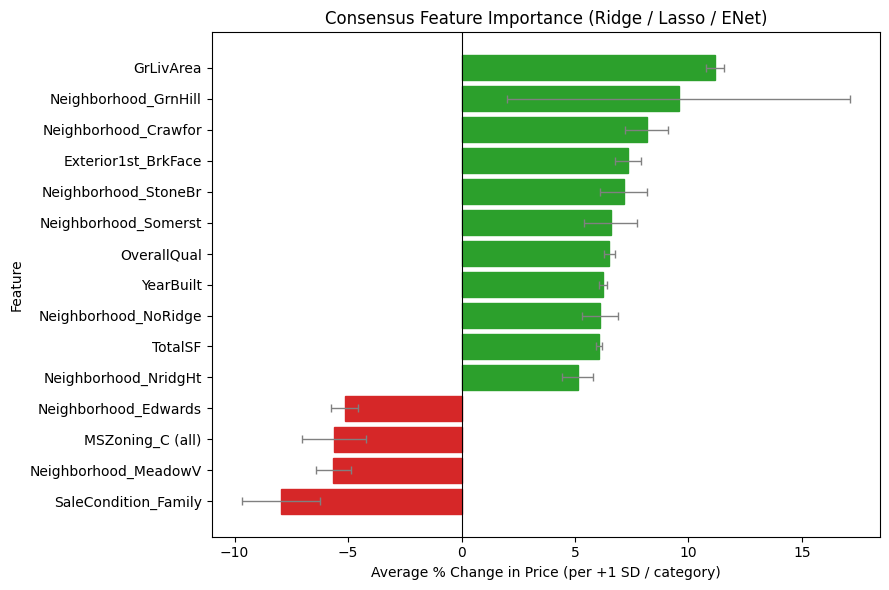

In [18]:
# =========================
# Consensus table + chart (fast, independent)
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

# --- config (reuse same grids from previous cell for consistency) ---
LOG_TARGET = True

# If these vars exist from the previous cell, we'll reuse them. Otherwise define defaults.
try:
    ridge_alphas
except NameError:
    ridge_alphas = np.linspace(8, 20, 13)

try:
    lasso_alphas
except NameError:
    lasso_alphas = np.r_[np.logspace(-4, -3, 5), np.linspace(0.0012, 0.01, 8)]

try:
    enet_alphas
except NameError:
    enet_alphas = lasso_alphas

try:
    enet_l1
except NameError:
    enet_l1 = [0.2, 0.4, 0.6]

# --- helpers: feature typing + coverage ---
def _is_one_hot_series(s: pd.Series) -> bool:
    vals = pd.unique(s.dropna())
    if set(np.asarray(vals)).issubset({0, 1, 0.0, 1.0}):
        return True
    if np.issubdtype(s.dtype, np.number):
        vmin, vmax = float(np.nanmin(s)), float(np.nanmax(s))
        return (vmin >= -0.05) and (vmax <= 1.05)
    return False

def _coverage_pct(s: pd.Series) -> float:
    if not np.issubdtype(s.dtype, np.number):
        return np.nan
    vals = pd.unique(s.dropna())
    if set(np.asarray(vals)).issubset({0, 1, 0.0, 1.0}):
        return float(s.mean() * 100.0)
    return float((s > 0.5).mean() * 100.0)

def _annotate_types_and_coverage(df_coef: pd.DataFrame, X: pd.DataFrame) -> pd.DataFrame:
    out = df_coef.copy()
    ftypes, cov = {}, {}
    for f in out["feature"]:
        if f in X.columns:
            if _is_one_hot_series(X[f]):
                ftypes[f] = "one-hot categorical"
                cov[f] = _coverage_pct(X[f])
            else:
                ftypes[f] = "numeric"
                cov[f] = 100.0
        else:
            ftypes[f] = "unknown"
            cov[f] = np.nan
    out["feature_type"] = out["feature"].map(ftypes)
    out["pct_of_data"]  = out["feature"].map(cov)
    return out

# --- fit on full data to get coefficients (independent of leaderboard CV) ---
y = Ames["SalePrice"]
y_trainable = np.log1p(y) if LOG_TARGET else y

ridge_full = RidgeCV(alphas=ridge_alphas, cv=None).fit(X_final, y_trainable)
lasso_full = LassoCV(alphas=lasso_alphas, cv=5, max_iter=200_000, n_jobs=-1).fit(X_final, y_trainable)
enet_full  = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_l1, cv=5, max_iter=200_000, n_jobs=-1).fit(X_final, y_trainable)

print("Chosen (full-data refit):",
      {"ridge_alpha": float(ridge_full.alpha_),
       "lasso_alpha": float(lasso_full.alpha_),
       "enet_alpha":  float(enet_full.alpha_),
       "enet_l1":     float(enet_full.l1_ratio_)})

# --- build per-model coef tables (log target ⇒ % change)
def _coef_table(model, name, X):
    coefs = pd.Series(model.coef_, index=X.columns)
    df = coefs.to_frame("coef").reset_index().rename(columns={"index": "feature"})
    df["pct_change"] = (np.exp(df["coef"]) - 1.0) * 100.0 if LOG_TARGET else np.nan
    df["abs_coef"] = df["coef"].abs()
    df["model"] = name
    return df

ridge_df = _annotate_types_and_coverage(_coef_table(ridge_full, "Ridge", X_final), X_final)
lasso_df = _annotate_types_and_coverage(_coef_table(lasso_full, "Lasso", X_final), X_final)
enet_df  = _annotate_types_and_coverage(_coef_table(enet_full,  "ElasticNet", X_final), X_final)

# --- consensus builder (require feature present in ≥2 models)
def build_consensus_table(ridge_df, lasso_df, enet_df, min_models: int = 2) -> pd.DataFrame:
    def _prep(df, tag):
        return df[["feature", "feature_type", "pct_change", "pct_of_data"]].rename(
            columns={"pct_change": f"{tag}_pct", "pct_of_data": f"{tag}_pct_of_data"}
        )

    merged = (
        _prep(ridge_df, "Ridge")
        .merge(_prep(lasso_df, "Lasso"), on=["feature", "feature_type"], how="outer")
        .merge(_prep(enet_df, "ElasticNet"), on=["feature", "feature_type"], how="outer")
    )

    model_cols = ["Ridge_pct", "Lasso_pct", "ElasticNet_pct"]
    merged["n_models"] = merged[model_cols].notna().sum(axis=1)
    merged = merged[merged["n_models"] >= min_models].copy()

    merged["avg_pct_change"] = merged[model_cols].mean(axis=1, skipna=True)
    merged["std_pct_change"] = merged[model_cols].std(axis=1, ddof=0, skipna=True)

    coverage_cols = ["Ridge_pct_of_data", "Lasso_pct_of_data", "ElasticNet_pct_of_data"]
    merged["pct_of_data"] = merged[coverage_cols].max(axis=1, skipna=True)

    return merged.sort_values("avg_pct_change", key=lambda s: s.abs(), ascending=False).reset_index(drop=True)

consensus = build_consensus_table(ridge_df, lasso_df, enet_df, min_models=2)

# --- plotter ---
def plot_consensus_bar(consensus_df: pd.DataFrame, top_n: int = 15, with_errorbars: bool = True,
                       figsize=(9, 6), title="Consensus Feature Importance (Ridge / Lasso / ENet)"):
    df = consensus_df.head(top_n).copy().sort_values("avg_pct_change", ascending=True)
    plt.figure(figsize=figsize)
    bars = plt.barh(df["feature"], df["avg_pct_change"])
    for b, val in zip(bars, df["avg_pct_change"]):
        b.set_color("tab:red" if val < 0 else "tab:green")
    if with_errorbars and "std_pct_change" in df.columns:
        x = df["avg_pct_change"].values
        err = df["std_pct_change"].fillna(0).values
        y = np.arange(len(df))
        plt.errorbar(x, y, xerr=err, fmt="none", ecolor="gray", capsize=3, linewidth=1)
    plt.axvline(0, color="black", lw=0.8)
    plt.xlabel("Average % Change in Price (per +1 SD / category)")
    plt.ylabel("Feature")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# --- show results ---
print("\n=== Consensus (top 20) ===")
display(consensus[["feature", "feature_type", "avg_pct_change", "std_pct_change", "pct_of_data"]].head(20))
plot_consensus_bar(consensus, top_n=15, with_errorbars=True)

In [31]:
# === Canonical linear tuning + evaluation (Ridge / Lasso / ElasticNet) ===
# Assumes you already defined: rmse(..) and cv_eval_models(..)
# Usage:
#   results, models_frozen, best = tune_and_eval_linear(X_final, Ames["SalePrice"], mode="compact")
#   # or for a broader sweep:
#   results_wide, models_wide, best_wide = tune_and_eval_linear(X_final, Ames["SalePrice"], mode="wide")

import time
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet

def tune_and_eval_linear(
    X, y,
    *,
    mode: str = "compact",          # "compact" (fast) or "wide" (broader search)
    log_target: bool = True,        # train in log space; metrics reported in $ via your helper
    outer_folds: int = 5,
    random_state: int = 42,
    verbose: bool = True
):
    t0 = time.time()
    y_trainable = np.log1p(y) if log_target else y

    # ----- search spaces -----
    if mode == "compact":
        ridge_alphas = np.linspace(8, 20, 13)               # around your usual best (~12)
        lasso_alphas = np.r_[np.logspace(-4, -3, 5),        # 1e-4 … 1e-3
                              np.linspace(0.0012, 0.01, 8)]  # 0.0012 … 0.01
        enet_alphas  = lasso_alphas
        enet_l1      = [0.2, 0.4, 0.6]                      # slim but representative
        inner_cv     = KFold(n_splits=5, shuffle=True, random_state=random_state)
    elif mode == "wide":
        ridge_alphas = np.logspace(-4, 2, 80)               # 1e-4 … 1e2
        lasso_alphas = np.logspace(-4, -1, 60)              # 1e-4 … 1e-1
        enet_alphas  = lasso_alphas
        enet_l1      = [0.2, 0.4, 0.6, 0.8]
        inner_cv     = KFold(n_splits=5, shuffle=True, random_state=random_state)
    else:
        raise ValueError("mode must be 'compact' or 'wide'")

    # ----- tuning -----
    # Ridge: GCV (cv=None) is fast & stable
    ridge_cv = RidgeCV(alphas=ridge_alphas, cv=None)
    ridge_cv.fit(X, y_trainable)
    best_ridge = float(ridge_cv.alpha_)

    # Lasso / ElasticNet: 5-fold CV; parallel; high max_iter for safety
    lasso_cv = LassoCV(
        alphas=lasso_alphas, cv=inner_cv,
        max_iter=200_000, tol=1e-3, random_state=random_state, n_jobs=-1
    ).fit(X, y_trainable)
    best_lasso = float(lasso_cv.alpha_)

    enet_cv = ElasticNetCV(
        alphas=enet_alphas, l1_ratio=enet_l1, cv=inner_cv,
        max_iter=200_000, tol=1e-3, random_state=random_state, n_jobs=-1
    ).fit(X, y_trainable)
    best_enet_alpha = float(enet_cv.alpha_)
    best_enet_l1    = float(enet_cv.l1_ratio_)

    best = {
        "ridge_alpha": best_ridge,
        "lasso_alpha": best_lasso,
        "enet_alpha":  best_enet_alpha,
        "enet_l1":     best_enet_l1,
        "mode":        mode
    }

    # ----- freeze + outer-CV evaluation (uses your cv_eval_models) -----
    models_frozen = [
        ("Ridge",       Ridge(alpha=best_ridge)),
        ("Lasso",       Lasso(alpha=best_lasso, max_iter=200_000)),
        ("ElasticNet",  ElasticNet(alpha=best_enet_alpha, l1_ratio=best_enet_l1, max_iter=200_000)),
    ]

    results = cv_eval_models(
        X, y, models_frozen, cv=outer_folds, log_target=log_target, random_state=random_state
    )

    if verbose:
        print("Best params:", best)
        print(f"\n=== LOG target leaderboard ({mode}) ===")
        print(results.to_string(index=False))
        print(f"\nElapsed: {(time.time()-t0):.2f} sec")

    return results, models_frozen, best

In [131]:
t0 = time.time()
results, models_frozen, best = tune_and_eval_linear(X_final, Ames.SalePrice)
print(f"\nElapsed: {(time.time()-t0):.2f} sec")

Best params: {'ridge_alpha': 12.0, 'lasso_alpha': 0.00031622776601683794, 'enet_alpha': 0.001, 'enet_l1': 0.2, 'mode': 'compact'}

=== LOG target leaderboard (compact) ===
     model  cv_rmse_mean  cv_rmse_std    r2_cv  r2_full
     Ridge  18866.527780  2395.816233 0.928401 0.942724
ElasticNet  18888.479261  2378.829041 0.928253 0.940642
     Lasso  18949.205348  2462.811697 0.927718 0.938370

Elapsed: 3.09 sec

Elapsed: 3.09 sec


In [132]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, GradientBoostingRegressor

# ---------- helpers ----------
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def cv_eval_models_nonlinear(
    X_raw, y, *,
    cv=5,
    log_target=False,
    random_state=42,
    models=None
):
    """
    Cross-validated evaluation for NON-LINEAR (tree-based) models on RAW (unscaled) features.
    Works with one-hot encoded categoricals; do NOT standardize numeric features.

    Returns a DataFrame with:
      - cv_rmse_mean / cv_rmse_std  (in $)
      - r2_cv   (R² on out-of-fold predictions, in $ space)
      - r2_full (R² when fitting on all data, in $ space)
    """
    # Default model set (all non-linear, no scaling needed)
    if models is None:
        models = [
            ("HistGB",       HistGradientBoostingRegressor(random_state=random_state)),
            ("RandomForest", RandomForestRegressor(n_estimators=800, random_state=random_state, n_jobs=-1)),
            ("ExtraTrees",   ExtraTreesRegressor(n_estimators=800, random_state=random_state, n_jobs=-1)),
            ("GradBoost",    GradientBoostingRegressor(random_state=random_state)),
        ]

    # y as numpy for robust positional indexing
    y_np = y.to_numpy() if hasattr(y, "to_numpy") else np.asarray(y)

    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)
    results = []

    for name, model in models:
        fold_rmses = []
        oof_pred = np.zeros(len(y_np), dtype=float)

        for tr_idx, va_idx in kf.split(X_raw):
            # positional split for X
            if hasattr(X_raw, "iloc"):
                X_tr, X_va = X_raw.iloc[tr_idx], X_raw.iloc[va_idx]
            else:
                X_tr, X_va = X_raw[tr_idx], X_raw[va_idx]

            # positional split for y
            y_tr, y_va = y_np[tr_idx], y_np[va_idx]

            # train on raw or log target
            y_tr_used = np.log1p(y_tr) if log_target else y_tr
            model.fit(X_tr, y_tr_used)

            # predict; back-transform if needed
            y_va_pred = model.predict(X_va)
            if log_target:
                y_va_pred = np.expm1(y_va_pred)

            # accumulate fold metrics in $ space
            fold_rmses.append(rmse(y_va, y_va_pred))
            oof_pred[va_idx] = y_va_pred

        # CV metrics from OOF preds (dollar space)
        r2_cv = r2_score(y_np, oof_pred)

        # Full-data fit (dollar space)
        y_full_used = np.log1p(y_np) if log_target else y_np
        model.fit(X_raw, y_full_used)
        y_full_pred = model.predict(X_raw)
        if log_target:
            y_full_pred = np.expm1(y_full_pred)
        r2_full = r2_score(y_np, y_full_pred)

        results.append({
            "model": name,
            "cv_rmse_mean": float(np.mean(fold_rmses)),
            "cv_rmse_std":  float(np.std(fold_rmses, ddof=0)),
            "r2_cv":  float(r2_cv),
            "r2_full": float(r2_full),
        })

    return pd.DataFrame(results).sort_values("cv_rmse_mean").reset_index(drop=True)

In [ ]:
X_raw = transformed_df.copy()

In [172]:
# X_raw is your transformed_df (one-hot + numeric, unscaled for trees)
X_raw = transformed_df.copy()

need = ["GrLivArea","OverallQual","TotalSF","TotalBaths","GarageCars",
        "HouseAge","HouseAgeSinceRemod"]
missing = [c for c in need if c not in X_raw.columns]
if missing:
    raise KeyError(f"These columns are missing from transformed_df: {missing}")

# Numeric × Numeric interactions
X_raw["GrLivArea_x_Qual"]   = X_raw["GrLivArea"]   * X_raw["OverallQual"]
X_raw["TotalSF_x_Qual"]     = X_raw["TotalSF"]     * X_raw["OverallQual"]
X_raw["Baths_x_Garage"]     = X_raw["TotalBaths"]  * X_raw["GarageCars"]
X_raw["Age_x_Qual"]         = X_raw["HouseAge"]    * X_raw["OverallQual"]
X_raw["AgeRemod_x_Qual"]    = X_raw["HouseAgeSinceRemod"] * X_raw["OverallQual"]

# Optional: clean any inf/NaN created by odd values
X_raw.replace([np.inf, -np.inf], np.nan, inplace=True)
X_raw.fillna(0, inplace=True)

print("X_raw with numeric interactions:", X_raw.shape)

X_raw with numeric interactions: (2580, 336)


In [173]:
# Use your *raw, unscaled* feature matrix (keep OHE; just skip StandardScaler on numerics)
# If you only have X_final (scaled), rebuild X_raw by skipping the scaler step in your pipeline.
t0 = time.time()


results_raw = cv_eval_models_nonlinear(X_raw, y_final, cv=5, log_target=False, random_state=42)
print("\n=== Non-linear models on RAW target (raw features) ===")
print(results_raw.to_string(index=False))

# results_log = cv_eval_models_nonlinear(X_raw, y_final, cv=5, log_target=True, random_state=42)
# print("\n=== Non-linear models on LOG target (raw features) ===")
# print(results_log.to_string(index=False))
print(f"\nElapsed: {(time.time()-t0)/60:.2f} min")


=== Non-linear models on RAW target (raw features) ===
       model  cv_rmse_mean  cv_rmse_std    r2_cv  r2_full
      HistGB  19335.643108  1694.746518 0.925421 0.987212
   GradBoost  19547.500318  1857.735964 0.923676 0.964614
  ExtraTrees  20439.835844  1109.706039 0.917051 0.999999
RandomForest  21283.131422  1775.641228 0.909706 0.988120

Elapsed: 0.62 min


In [210]:
# --- Nonlinear tuning + evaluation (drop-in) ---
import time
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

RANDOM_STATE = 42
INNER_CV = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

def make_ttr(est):
    """Wrap an estimator to train on log1p(y) and predict in $-space."""
    return TransformedTargetRegressor(
        regressor=est,
        func=np.log1p,
        inverse_func=np.expm1
    )

# --------- 1) Define param grids (compact & effective) ---------
hgb_param_grid = {
    "regressor__learning_rate": [0.1, 0.05, 0.02, 0.01],
    "regressor__max_iter":      [500, 800, 1200, 2000],
    "regressor__max_depth":     [None, 6, 8, 10],
    "regressor__min_samples_leaf": [5, 10, 20, 30],
    "regressor__max_bins":      [64, 128, 255],
    "regressor__l2_regularization": [0.0, 1e-3, 1e-2]
}

rf_param_grid = {
    "regressor__n_estimators":   [600, 800, 1000, 1200],
    "regressor__max_depth":      [None, 20, 30, 40],
    "regressor__min_samples_leaf":[1, 3, 5, 10],
    "regressor__max_features":   ["sqrt", 0.3, 0.5, 0.7],
    "regressor__bootstrap":      [True],
    "regressor__n_jobs":         [-1],   # always parallelize RF
    "regressor__random_state":   [RANDOM_STATE]
}

# --------- 2) Set up searches (optimize RMSE in $-space) ---------
hgb_search = RandomizedSearchCV(
    estimator=make_ttr(HistGradientBoostingRegressor(random_state=RANDOM_STATE)),
    param_distributions=hgb_param_grid,
    n_iter=30,
    scoring="neg_root_mean_squared_error",
    cv=INNER_CV,
    n_jobs=-1,
    verbose=0,
    random_state=RANDOM_STATE
)

rf_search = RandomizedSearchCV(
    estimator=make_ttr(RandomForestRegressor(random_state=RANDOM_STATE)),
    param_distributions=rf_param_grid,
    n_iter=30,
    scoring="neg_root_mean_squared_error",
    cv=INNER_CV,
    n_jobs=-1,
    verbose=0,
    random_state=RANDOM_STATE
)

# --------- 3) Run searches ---------
t0 = time.time()
hgb_search.fit(X_raw, y_final)
rf_search.fit(X_raw, y_final)
print(f"Tuning elapsed: {time.time()-t0:.1f}s")

def _strip_prefix(d, prefix="regressor__"):
    return {k[len(prefix):] if k.startswith(prefix) else k: v for k, v in d.items()}

print("\nBest HistGB params:", _strip_prefix(hgb_search.best_params_))
print("Best HistGB CV RMSE ($):", -hgb_search.best_score_)
print("\nBest RandomForest params:", _strip_prefix(rf_search.best_params_))
print("Best RF CV RMSE ($):", -rf_search.best_score_)

# --------- 4) Build tuned models list & evaluate with your existing OOF leaderboard ---------
models_tuned = [
    ("HistGB_tuned",  hgb_search.best_estimator_),   # these are TransformedTargetRegressor-wrapped
    ("RandomForest_tuned", rf_search.best_estimator_)
]

# IMPORTANT: set log_target=False because the TTR already handles log-transform internally.
t1 = time.time()
tuned_results = cv_eval_models_nonlinear(
    X_raw, y_final, cv=5, log_target=False, random_state=RANDOM_STATE, models=models_tuned
)
print("\n=== Tuned non-linear leaderboard (log target via TTR) ===")
print(tuned_results.to_string(index=False))
print(f"\nEvaluation elapsed: {time.time()-t1:.1f}s")

Exception ignored in: <function ResourceTracker.__del__ at 0x1061a5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106d65bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102ad9bc0>
Traceback (most recent call last

Tuning elapsed: 233.1s

Best HistGB params: {'min_samples_leaf': 5, 'max_iter': 2000, 'max_depth': 10, 'max_bins': 128, 'learning_rate': 0.01, 'l2_regularization': 0.0}
Best HistGB CV RMSE ($): 18469.89251064911

Best RandomForest params: {'random_state': 42, 'n_jobs': -1, 'n_estimators': 600, 'min_samples_leaf': 1, 'max_features': 0.3, 'max_depth': 40, 'bootstrap': True}
Best RF CV RMSE ($): 20641.36437002218

=== Tuned non-linear leaderboard (log target via TTR) ===
             model  cv_rmse_mean  cv_rmse_std    r2_cv  r2_full
      HistGB_tuned  18469.892511  1958.735316 0.931709 0.996417
RandomForest_tuned  20641.364370  1231.640705 0.915356 0.988591

Evaluation elapsed: 104.2s


In [185]:
# === Dual importance plots: Permutation vs SHAP (HistGB) ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# 0) Make sure X is dense and names line up
X = transformed_data.toarray() if hasattr(transformed_data, "toarray") else np.asarray(transformed_data)

if 'feature_names' not in globals() or len(feature_names) != X.shape[1]:
    feature_names = [f"f{i}" for i in range(X.shape[1])]

# 1) Permutation importances (uses R² by default)
perm = permutation_importance(
    best_histgb, X, y_final, n_repeats=5, random_state=42, n_jobs=-1
)
perm_scores = perm.importances_mean  # higher = more important
perm_idx = np.argsort(perm_scores)[::-1]

# 2) SHAP (mean |SHAP| per feature)
import shap
# small, stratified-ish sample for speed
rng = np.random.default_rng(42)
n_shap = min(1200, X.shape[0])
sample_idx = rng.choice(X.shape[0], size=n_shap, replace=False)
X_shap = X[sample_idx]

# For sklearn tree models, generic Explainer works well
explainer = shap.Explainer(best_histgb)
shap_values = explainer(X_shap)           # shap_values.values shape: (n_samples, n_features)
shap_mean_abs = np.abs(shap_values.values).mean(axis=0)
shap_idx = np.argsort(shap_mean_abs)[::-1]

# 3) Plot top-k side by side
k = 20
top_perm_idx = perm_idx[:k]
top_shap_idx = shap_idx[:k]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Permutation importances
axes[0].barh(range(k), perm_scores[top_perm_idx][::-1])
axes[0].set_yticks(range(k))
axes[0].set_yticklabels(np.array(feature_names)[top_perm_idx][::-1])
axes[0].set_title("Permutation Importance (R² drop)")
axes[0].set_xlabel("Mean importance")
axes[0].invert_yaxis()

# Right: SHAP mean |impact|
axes[1].barh(range(k), shap_mean_abs[top_shap_idx][::-1])
axes[1].set_yticks(range(k))
axes[1].set_yticklabels(np.array(feature_names)[top_shap_idx][::-1])
axes[1].set_title("SHAP Mean |Impact|")
axes[1].set_xlabel("Mean |SHAP value|")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 331 features, but HistGradientBoostingRegressor is expecting 336 features as input.

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import shap

# --- Fit preprocessing pipeline ---
X_base = preprocessor.fit_transform(Ames)
y = Ames['SalePrice']

# --- Capture clean feature names ---
feature_names = []
for name, trans, cols in preprocessor.transformers_:
    if name == 'drop' or trans == 'drop':
        continue

    # dig into pipelines
    if hasattr(trans, 'named_steps'):
        last_step = list(trans.named_steps.values())[-1]
    else:
        last_step = trans

    if hasattr(last_step, "get_feature_names_out"):
        fn = last_step.get_feature_names_out(cols)
    else:
        fn = cols
    feature_names.extend(fn)

# --- (1) Baseline model ---
base_model = best_histgb.fit(X_base, y)

perm_base = permutation_importance(base_model, X_base, y, n_repeats=10, random_state=42)
shap_base = shap.Explainer(base_model, X_base)(X_base)

# --- (2) Interaction features added ---
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_interact = poly.fit_transform(X_base)

# get interaction feature names
interaction_names = poly.get_feature_names_out(feature_names)

inter_model = best_histgb.fit(X_interact, y)

perm_inter = permutation_importance(inter_model, X_interact, y, n_repeats=10, random_state=42)
shap_inter = shap.Explainer(inter_model, X_interact)(X_interact)

# --- Plot helper ---
def plot_barh(ax, importances, names, k=20, title=""):
    idx = np.argsort(importances)[-k:][::-1]
    ax.barh(range(len(idx)), importances[idx])
    ax.set_yticks(range(len(idx)))
    ax.set_yticklabels(np.array(names)[idx])
    ax.set_title(title)

# --- Four panel comparison ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

plot_barh(axes[0,0], perm_base.importances_mean, feature_names,
          k=20, title="Permutation (Baseline)")
plot_barh(axes[0,1], perm_inter.importances_mean, interaction_names,
          k=20, title="Permutation (With interactions)")

plot_barh(axes[1,0], np.abs(shap_base.values).mean(0), feature_names,
          k=20, title="SHAP Mean |Impact| (Baseline)")
plot_barh(axes[1,1], np.abs(shap_inter.values).mean(0), interaction_names,
          k=20, title="SHAP Mean |Impact| (With interactions)")

plt.tight_layout()
plt.show()

 99%|===================| 2555/2580 [01:23<00:00]        

KeyboardInterrupt: 

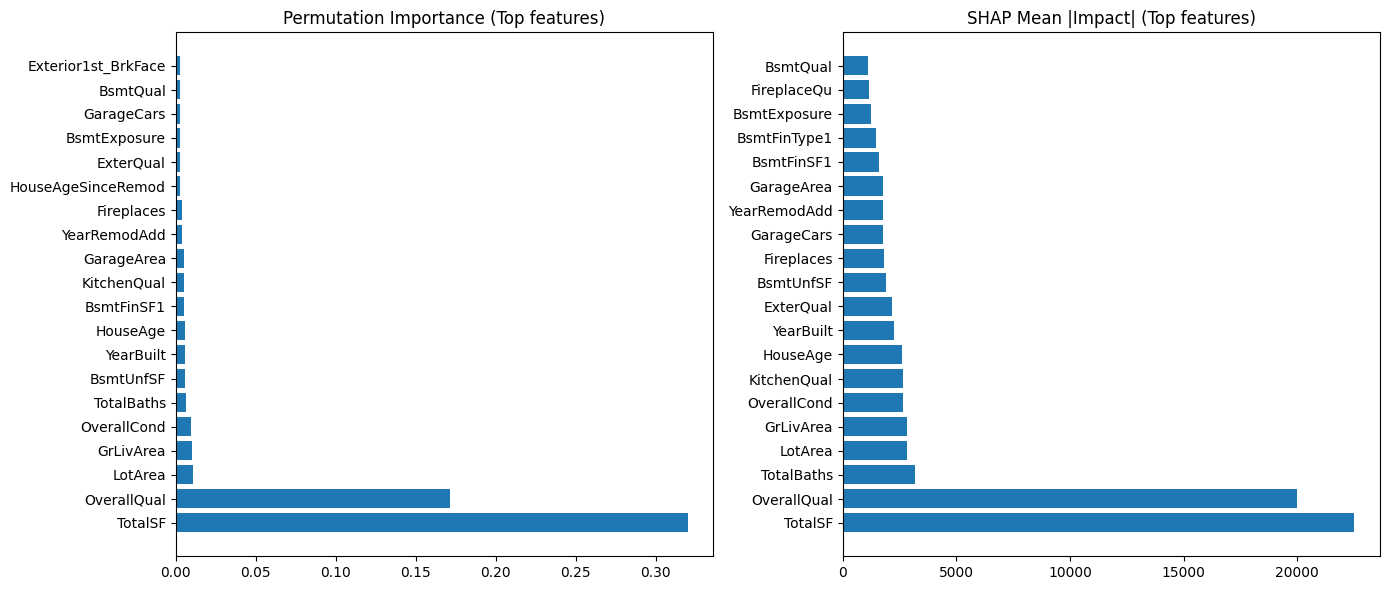

In [183]:
# ---- FAST importance plots without PolynomialFeatures ----
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import shap

# 1) Use your already-preprocessed data (no polynomial expansion)
X = transformed_df  # includes your engineered & interaction features
y = Ames["SalePrice"]

# If you have a tuned HGB model object, use it; otherwise create a solid default:
try:
    hgb = best_histgb  # your tuned HistGradientBoostingRegressor
except NameError:
    from sklearn.ensemble import HistGradientBoostingRegressor
    hgb = HistGradientBoostingRegressor(
        learning_rate=0.05, max_iter=800, max_depth=6, max_bins=64,
        min_samples_leaf=10, random_state=42
    )

hgb.fit(X, y)

# 2) Permutation importance (keep repeats modest to stay fast)
perm = permutation_importance(
    hgb, X, y, n_repeats=5, random_state=42
)

# 3) SHAP for tree models (use TreeExplainer + a small sample to be fast)
explainer = shap.TreeExplainer(hgb)
sample_idx = np.random.RandomState(42).choice(len(X), size=min(800, len(X)), replace=False)
X_sample = X.iloc[sample_idx]
shap_values = explainer.shap_values(X_sample)

# 4) Plot helpers
def topk(arr, names, k=20):
    idx = np.argsort(arr)[-k:][::-1]
    return idx, np.array(names)[idx], arr[idx]

def plot_barh(ax, names, vals, title):
    ax.barh(range(len(vals)), vals)
    ax.set_yticks(range(len(vals)))
    ax.set_yticklabels(names)
    ax.set_title(title)

# 5) Build the four-panel figure (baseline vs interactions not needed here;
#     you’re already using the dataset that includes your chosen interactions)
k = 20
idx_p, names_p, vals_p = topk(perm.importances_mean, X.columns, k)
idx_s, names_s, vals_s = topk(np.abs(shap_values).mean(axis=0), X_sample.columns, k)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_barh(axes[0], names_p, vals_p, "Permutation Importance (Top features)")
plot_barh(axes[1], names_s, vals_s, "SHAP Mean |Impact| (Top features)")
plt.tight_layout()
plt.show()

Exception ignored in: <function ResourceTracker.__del__ at 0x10747dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102d65bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10696dbc0>
Traceback (most recent call last

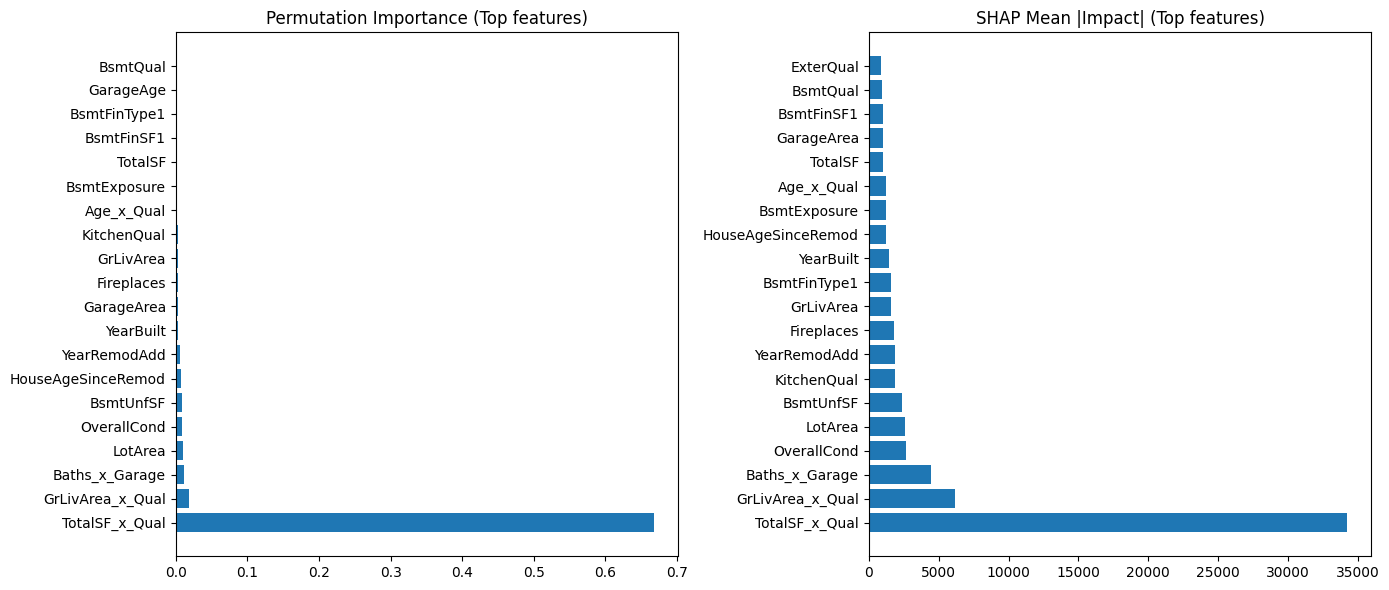

In [184]:
# ---- FAST importance plots without PolynomialFeatures ----
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import shap

# 1) Use your already-preprocessed data (no polynomial expansion)
X = transformed_df  # includes your engineered & interaction features
X = X_raw
y = Ames["SalePrice"]

# If you have a tuned HGB model object, use it; otherwise create a solid default:
try:
    hgb = best_histgb  # your tuned HistGradientBoostingRegressor
except NameError:
    from sklearn.ensemble import HistGradientBoostingRegressor
    hgb = HistGradientBoostingRegressor(
        learning_rate=0.05, max_iter=800, max_depth=6, max_bins=64,
        min_samples_leaf=10, random_state=42
    )

hgb.fit(X, y)

# 2) Permutation importance (keep repeats modest to stay fast)
perm = permutation_importance(
    hgb, X, y, n_repeats=5, random_state=42
)

# 3) SHAP for tree models (use TreeExplainer + a small sample to be fast)
explainer = shap.TreeExplainer(hgb)
sample_idx = np.random.RandomState(42).choice(len(X), size=min(800, len(X)), replace=False)
X_sample = X.iloc[sample_idx]
shap_values = explainer.shap_values(X_sample)

# 4) Plot helpers
def topk(arr, names, k=20):
    idx = np.argsort(arr)[-k:][::-1]
    return idx, np.array(names)[idx], arr[idx]

def plot_barh(ax, names, vals, title):
    ax.barh(range(len(vals)), vals)
    ax.set_yticks(range(len(vals)))
    ax.set_yticklabels(names)
    ax.set_title(title)

# 5) Build the four-panel figure (baseline vs interactions not needed here;
#     you’re already using the dataset that includes your chosen interactions)
k = 20
idx_p, names_p, vals_p = topk(perm.importances_mean, X.columns, k)
idx_s, names_s, vals_s = topk(np.abs(shap_values).mean(axis=0), X_sample.columns, k)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_barh(axes[0], names_p, vals_p, "Permutation Importance (Top features)")
plot_barh(axes[1], names_s, vals_s, "SHAP Mean |Impact| (Top features)")
plt.tight_layout()
plt.show()

In [186]:
# =========================
# Build a lean X_refined
# =========================
import pandas as pd

# 1) Core numeric features (keep if present)
core_numeric = [
    "TotalSF", "OverallQual", "GrLivArea", "TotalBaths",
    # keep ONE garage signal; we'll pick what's available below
    "GarageCars", "GarageArea",
    "LotArea", "YearBuilt", "YearRemodAdd",
    "HouseAge", "HouseAgeSinceRemod",
]

# 2) Targeted interactions (from your earlier engineering)
interactions = [
    "TotalSF_x_Qual", "GrLivArea_x_Qual",
    "Baths_x_Garage", "Age_x_Qual"
    # add "AgeRemod_x_Qual" here if you created it and want it
    # "AgeRemod_x_Qual",
]

# 3) Compact categorical dummies (prefix match)
#    - use the binned Neighborhood × quality combo (much leaner than full Neighborhood)
cat_prefixes = [
    "Neighborhood_QualBin_",
    "KitchenQual_", "BsmtQual_", "ExterQual_"
]

# ---- collect columns that actually exist in X_raw ----
present = set(X_raw.columns)

# pick one garage signal: prefer GarageCars, else GarageArea
garage_choice = "GarageCars" if "GarageCars" in present else ("GarageArea" if "GarageArea" in present else None)
core_keep = [c for c in core_numeric if c in present and c != "GarageCars" and c != "GarageArea"]
if garage_choice: 
    core_keep.append(garage_choice)

inter_keep = [c for c in interactions if c in present]

cat_keep = []
for p in cat_prefixes:
    cat_keep.extend([c for c in transformed_df.columns if c.startswith(p)])

keep_cols = core_keep + inter_keep + cat_keep
X_refined = X_raw[keep_cols].copy()

print(f"X_refined shape: {X_refined.shape}")
print("Kept (first 25):", keep_cols[:25])
missing = (set(core_numeric + interactions) - present)
if missing:
    print("Note: these requested columns were not found and were skipped:", sorted(missing))

X_refined shape: (2580, 78)
Kept (first 25): ['TotalSF', 'OverallQual', 'GrLivArea', 'TotalBaths', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'HouseAge', 'HouseAgeSinceRemod', 'GarageCars', 'TotalSF_x_Qual', 'GrLivArea_x_Qual', 'Baths_x_Garage', 'Age_x_Qual', 'Neighborhood_QualBin_Blmngtn_high', 'Neighborhood_QualBin_Blmngtn_med', 'Neighborhood_QualBin_Blueste_high', 'Neighborhood_QualBin_Blueste_med', 'Neighborhood_QualBin_BrDale_low', 'Neighborhood_QualBin_BrDale_med', 'Neighborhood_QualBin_BrkSide_low', 'Neighborhood_QualBin_BrkSide_med', 'Neighborhood_QualBin_ClearCr_high', 'Neighborhood_QualBin_ClearCr_low', 'Neighborhood_QualBin_ClearCr_med']


In [187]:
# Example: evaluate tuned HistGB or your linear baselines on X_refined
print(cv_eval_models_nonlinear(X_refined, y_final, cv=5, log_target=False, random_state=42).to_string(index=False))

       model  cv_rmse_mean  cv_rmse_std    r2_cv  r2_full
   GradBoost  21996.285960  1249.224307 0.903911 0.941458
  ExtraTrees  22167.514782  1145.876691 0.902463 0.999988
      HistGB  22370.225027  1482.010967 0.900501 0.968986
RandomForest  22720.961145  1580.229377 0.897311 0.986261


In [221]:
# === Compact feature set: top-K base features + engineered interactions ===
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import HistGradientBoostingRegressor

RANDOM_STATE = 42
TOP_K_BASE = 125   # number of base (non-interaction) features to keep

# -------------------------------
# A) Start from your preprocessed table
# -------------------------------
X_base = transformed_df.copy()        # (one-hot + numeric, no scaling needed for trees)
y = y_final

# -------------------------------
# B) Add interaction features (only if both parents exist)
# -------------------------------
def safe_interaction(df, out_name, a, b):
    if a in df.columns and b in df.columns:
        df[out_name] = df[a] * df[b]

safe_interaction(X_base, "TotalSF_x_Qual",   "TotalSF",   "OverallQual")
safe_interaction(X_base, "GrLivArea_x_Qual", "GrLivArea", "OverallQual")
safe_interaction(X_base, "Baths_x_Garage",   "TotalBaths","GarageCars")
safe_interaction(X_base, "Age_x_Qual",       "HouseAge",  "OverallQual")
safe_interaction(X_base, "AgeRemod_x_Qual",  "HouseAgeSinceRemod", "OverallQual")

interaction_cols = [c for c in X_base.columns if c.endswith("_x_Qual") or c=="Baths_x_Garage"]

# -------------------------------
# C) Fit a fast tree on log-target (TTR) to rank BASE features
# -------------------------------
# Reasonable, stable HGB settings (close to what performed well for you)
hgb = HistGradientBoostingRegressor(
    learning_rate=0.03, max_iter=1200, max_depth=6,
    min_samples_leaf=20, max_bins=64, l2_regularization=0.0,
    random_state=RANDOM_STATE
)
ttr = TransformedTargetRegressor(regressor=hgb, func=np.log1p, inverse_func=np.expm1)

# Train once (fast)
ttr.fit(X_base, y)

# Try SHAP first; fall back to permutation importance if SHAP isn't available
try:
    import shap
    expl = shap.Explainer(ttr.regressor_, X_base, feature_names=X_base.columns)
    shap_vals = expl(X_base, check_additivity=False)
    shap_importance = np.abs(shap_vals.values).mean(axis=0)
    imp_series = pd.Series(shap_importance, index=X_base.columns).sort_values(ascending=False)
except Exception:
    # Permutation importance in R² space (dollar target because TTR inverts)
    perm = permutation_importance(ttr, X_base, y, n_repeats=8, random_state=RANDOM_STATE, n_jobs=-1, scoring="r2")
    imp_series = pd.Series(perm.importances_mean, index=X_base.columns).sort_values(ascending=False)

# Exclude interactions from the base top-K selection to avoid double bias
base_pool = [c for c in X_base.columns if c not in interaction_cols]
top_base = [c for c in imp_series.index if c in base_pool][:TOP_K_BASE]

# -------------------------------
# D) Build refined matrix = top base + interactions
# -------------------------------
keep_cols = list(dict.fromkeys(top_base + interaction_cols))  # preserve order, drop dups
X_refined = X_base[keep_cols].copy()

print(f"Refined feature set: {len(keep_cols)} columns "
      f"(base={len(top_base)}, interactions={len(interaction_cols)})")

# -------------------------------
# E) (Optional) quick CV check with the same HGB+TTR
# -------------------------------
def rmse(y_true, y_pred): 
    return float(np.sqrt(((y_true - y_pred) ** 2).mean()))

kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
fold_rmses = []
oof = np.zeros(len(y), dtype=float)

for tr_idx, va_idx in kf.split(X_refined):
    X_tr, X_va = X_refined.iloc[tr_idx], X_refined.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]
    ttr.fit(X_tr, y_tr)
    pred = ttr.predict(X_va)
    fold_rmses.append(rmse(y_va, pred))
    oof[va_idx] = pred

print(f"Quick CV — RMSE mean: {np.mean(fold_rmses):,.0f}  std: {np.std(fold_rmses):,.0f}   R²: {r2_score(y, oof):.6f}")

# Your refined table is in X_refined

 98%|===================| 2517/2580 [00:40<00:01]        

Refined feature set: 130 columns (base=125, interactions=5)
Quick CV — RMSE mean: 18,726  std: 1,629   R²: 0.930057


In [215]:
param_grid = {
    'max_depth': [4, 6, 8, 10],
    'max_bins': [32, 64, 128],
    'min_samples_leaf': [5, 10, 20],
    'max_iter': [1000, 1500, 2000],
    'learning_rate': [0.01, 0.03, 0.05],
    'l2_regularization': [0.0, 0.1, 0.3, 1.0],
}

histgb = HistGradientBoostingRegressor(random_state=42)

grid = GridSearchCV(
    histgb,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid.fit(X_refined, y)
print("Best params:", grid.best_params_)
print("Best CV RMSE:", -grid.best_score_)

Exception ignored in: <function ResourceTracker.__del__ at 0x107191bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106c65bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107465bc0>
Traceback (most recent call last

KeyboardInterrupt: 

In [ ]:
# ==== Lean HistGB tuner for X_refined ====
import time
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import HistGradientBoostingRegressor

RANDOM_STATE = 42
INNER_CV = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

def make_ttr(est):
    return TransformedTargetRegressor(
        regressor=est,
        func=np.log1p,      # train on log price
        inverse_func=np.expm1
    )

# Tight ranges centered on what worked before
param_dist = {
    "regressor__learning_rate":   np.array([0.01, 0.02, 0.03, 0.04, 0.05]),
    "regressor__max_iter":        np.array([1000, 1400, 1600, 1800, 2000]),
    "regressor__max_depth":       [4, 6, 8, 10],
    "regressor__min_samples_leaf":[5, 10, 15, 20, 30],
    "regressor__max_bins":        [64, 96, 128],
    "regressor__l2_regularization":[0.0, 0.1, 0.3],
}

hgb = HistGradientBoostingRegressor(random_state=RANDOM_STATE)
search = RandomizedSearchCV(
    estimator=make_ttr(hgb),
    param_distributions=param_dist,
    n_iter=22,                                # ~ fast but thorough
    scoring="neg_root_mean_squared_error",    # RMSE in $ (thanks to TTR)
    cv=INNER_CV,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

t0 = time.time()
search.fit(X_refined, y_final)   # <— use your refined matrix here
print(f"\nTuning elapsed: {time.time()-t0:.1f}s")

# Pretty print best
best_params = {k.replace("regressor__", ""): v for k, v in search.best_params_.items()}
print("Best HistGB params:", best_params)
print("Best CV RMSE ($):", -search.best_score_)

# === Optional: quick outer-CV check with your existing helper ===
# If you have cv_eval_models_nonlinear from earlier and want a leaderboard-style eval:
# models_tuned = [("HistGB_tuned", search.best_estimator_)]
# print(cv_eval_models_nonlinear(X_refined, y_final, cv=5, log_target=False,
#                                random_state=RANDOM_STATE, models=models_tuned)
#       .to_string(index=False))

In [ ]:
# === Refined GridSearch for HistGradientBoostingRegressor ===
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor

# Assumes you already have:
#   X_refined  -> your current best feature matrix (pandas DataFrame or ndarray)
#   y          -> SalePrice (raw $ target)

RANDOM_STATE = 42
inner_cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

param_grid_refined = {
    'max_depth': [3, 4, 5],
    'max_bins': [64, 96],
    'min_samples_leaf': [3, 5, 8],
    'max_iter': [800, 1000, 1200],
    'learning_rate': [0.04, 0.05, 0.06],
    'l2_regularization': [0.05, 0.1, 0.2],
}

histgb = HistGradientBoostingRegressor(random_state=RANDOM_STATE)

grid_ref = GridSearchCV(
    estimator=histgb,
    param_grid=param_grid_refined,
    scoring='neg_root_mean_squared_error',   # RMSE in $-space
    cv=inner_cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

grid_ref.fit(X_refined, y)

best_rmse = -grid_ref.best_score_
print("\n[Refined GridSearch] Best params:", grid_ref.best_params_)
print(f"[Refined GridSearch] Best CV RMSE: {best_rmse:,.2f} $")

# ---- Quick confirmation CV with the best estimator ----
best_est = grid_ref.best_estimator_

rmse_scores = -cross_val_score(best_est, X_refined, y,
                               scoring='neg_root_mean_squared_error',
                               cv=inner_cv, n_jobs=-1)
r2_scores = cross_val_score(best_est, X_refined, y,
                            scoring='r2',
                            cv=inner_cv, n_jobs=-1)

print(f"\n[Confirm CV] RMSE mean: {rmse_scores.mean():,.0f}  std: {rmse_scores.std():,.0f}   "
      f"R² mean: {r2_scores.mean():.6f}")

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
